In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import requests
from bs4 import BeautifulSoup

In [3]:
cs = pd.read_csv('contestant_table.csv')
cs.head()

,contestant_name,age,hometown,profession,num_season,finish,gender,african_american,asian_american,latin_american,...,num_boot,tribe1,tribe2,tribe3,quit,evac,ejected,fmc,num_jury_votes,normalized_finish
0,Sonja Christopher,63,"Walnut Creek, CA",Musician/Retired Teacher,1,16,F,0,0,0,...,1,Tagi,NaN,NaN,0,0,0,0,NaN,0.0000
1,B.B. Andersen,64,"Mission Hills, KS",Real Estate Developer,1,15,M,0,0,0,...,2,Pagong,NaN,NaN,0,0,0,0,NaN,0.0625
2,Stacey Stillman,27,"San Francisco, CA",Attorney,1,14,F,0,0,0,...,3,Tagi,NaN,NaN,0,0,0,0,NaN,0.1250
3,Ramona Gray,29,"Edison, NJ",Biochemist,1,13,F,1,0,0,...,4,Pagong,NaN,NaN,0,0,0,0,NaN,0.1875
4,Dirk Been,23,"Spring Green, WI",Dairy Farmer,1,12,M,0,0,0,...,5,Tagi,NaN,NaN,0,0,0,0,NaN,0.2500


In [5]:
cs.describe()

,age,num_season,finish,african_american,asian_american,latin_american,poc,jewish,muslim,lgbt,...,jury,ftc,votes_against,num_boot,quit,evac,ejected,fmc,num_jury_votes,normalized_finish
count,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,...,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,114.000000,785.000000
mean,33.410191,22.547771,9.682803,0.145223,0.078981,0.080255,0.294268,0.045860,0.005096,0.082803,...,0.374522,0.145223,6.006369,9.698089,0.016561,0.021656,0.001274,0.020382,3.192982,0.473011
std,10.098363,12.241952,5.381376,0.352550,0.269881,0.271860,0.456003,0.209314,0.071246,0.275759,...,0.484308,0.352550,3.331009,5.382493,0.127699,0.145651,0.035692,0.141394,2.896067,0.288981
min,18.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,26.000000,12.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,4.000000,5.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.222222
50%,31.000000,23.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,6.000000,10.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.473684
75%,40.000000,33.000000,14.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,8.000000,14.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.722222
max,75.000000,43.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,22.000000,20.000000,1.000000,1.000000,1.000000,1.000000,12.000000,0.950000


In [7]:
cs.shape

(785, 32)

In [9]:
cs.columns

Index(['contestant_name', 'age', 'hometown', 'profession', 'num_season',
       'finish', 'gender', 'african_american', 'asian_american',
       'latin_american', 'poc', 'jewish', 'muslim', 'lgbt', 'state', 'country',
       'num_appearance', 'birthdate', 'merge', 'jury', 'ftc', 'votes_against',
       'num_boot', 'tribe1', 'tribe2', 'tribe3', 'quit', 'evac', 'ejected',
       'fmc', 'num_jury_votes', 'normalized_finish'],
      dtype='object')

In [11]:
cs.isnull().sum()

contestant_name        0
age                    0
hometown               0
profession             0
num_season             0
finish                 0
gender                 0
african_american       0
asian_american         0
latin_american         0
poc                    0
jewish                 0
muslim                 0
lgbt                   0
state                  0
country                0
num_appearance         0
birthdate              0
merge                  0
jury                   0
ftc                    0
votes_against          0
num_boot               0
tribe1                 2
tribe2               339
tribe3               697
quit                   0
evac                   0
ejected                0
fmc                    0
num_jury_votes       671
normalized_finish      0
dtype: int64

In [13]:
cs.country.unique()

array(['US', 'CA'], dtype=object)

In [15]:
st = pd.read_csv('season_table.csv')
st.head()

,num_season,season,merged_tribe,num_merge,day_merge,num_jury,num_ftc,num_swaps,num_contestants,redemption_island,...,african_american,asian_american,latin_american,poc,lgbt,jewish,muslim,num_quits,num_evacs,winner
0,1,Survivor: Borneo,Rattana,10,20,7,2,0,16,0,...,2,0,0,2,2,0,0,0,0,Richard Hatch
1,2,Survivor: The Australian Outback,Barramundi,10,20,7,2,0,16,0,...,2,0,1,3,2,0,0,0,1,Tina Wesson
2,3,Survivor: Africa,Moto Maji,10,20,7,2,1,16,0,...,2,0,1,3,1,1,0,0,0,Ethan Zohn
3,4,Survivor: Marquesas,Soliantu,10,20,7,2,1,16,0,...,2,0,0,2,1,0,0,0,0,Vecepia Towery
4,5,Survivor: Thailand,Chuay Jai,8,25,7,2,0,16,0,...,2,1,0,3,0,0,0,0,0,Brian Heidik


In [17]:
st.columns

Index(['num_season', 'season', 'merged_tribe', 'num_merge', 'day_merge',
       'num_jury', 'num_ftc', 'num_swaps', 'num_contestants',
       'redemption_island', 'edge_of_extinction', 'num_days',
       'african_american', 'asian_american', 'latin_american', 'poc', 'lgbt',
       'jewish', 'muslim', 'num_quits', 'num_evacs', 'winner'],
      dtype='object')

In [19]:
tt = pd.read_csv('tribe_table.csv')
tt.head()

,num_season,tribe,iter_num,num_contestants,merge,african_american,asian_american,latin_american,poc,jewish,muslim,lgbt,male,female,non_binary,color
0,1,Tagi,1,8,0,0,0,0,0,0,0,2,4,4,0,Orange
1,1,Pagong,1,8,0,2,0,0,2,0,0,0,4,4,0,Yellow/Gold
2,1,Rattana,0,10,1,1,0,0,1,0,0,1,5,5,0,Green
3,2,Kucha,1,8,0,2,0,0,2,0,0,1,4,4,0,Blue/Teal
4,2,Ogakor,1,8,0,0,0,1,1,0,0,1,4,4,0,Green


In [21]:
tt.columns

Index(['num_season', 'tribe', 'iter_num', 'num_contestants', 'merge',
       'african_american', 'asian_american', 'latin_american', 'poc', 'jewish',
       'muslim', 'lgbt', 'male', 'female', 'non_binary', 'color'],
      dtype='object')

In [23]:
ct = cs

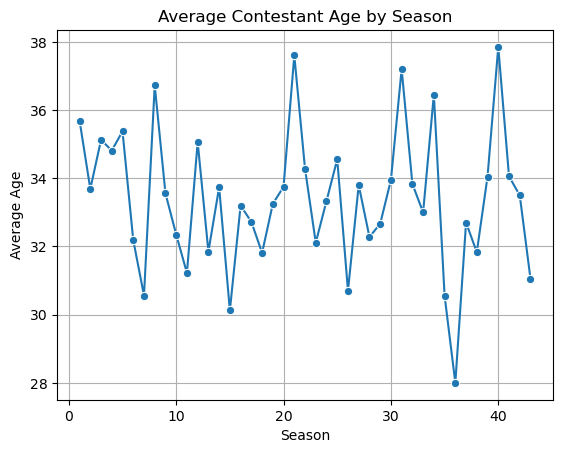

In [25]:
#import seaborn as sns
#import matplotlib.pyplot as plt

# Group by season and get mean age
age_by_season = ct.groupby('num_season')['age'].mean().reset_index()

# Plot
sns.lineplot(data = age_by_season, x = 'num_season', y = 'age', marker = 'o')
plt.title('Average Contestant Age by Season')
plt.xlabel('Season')
plt.ylabel('Average Age')
plt.grid(True)
plt.show()

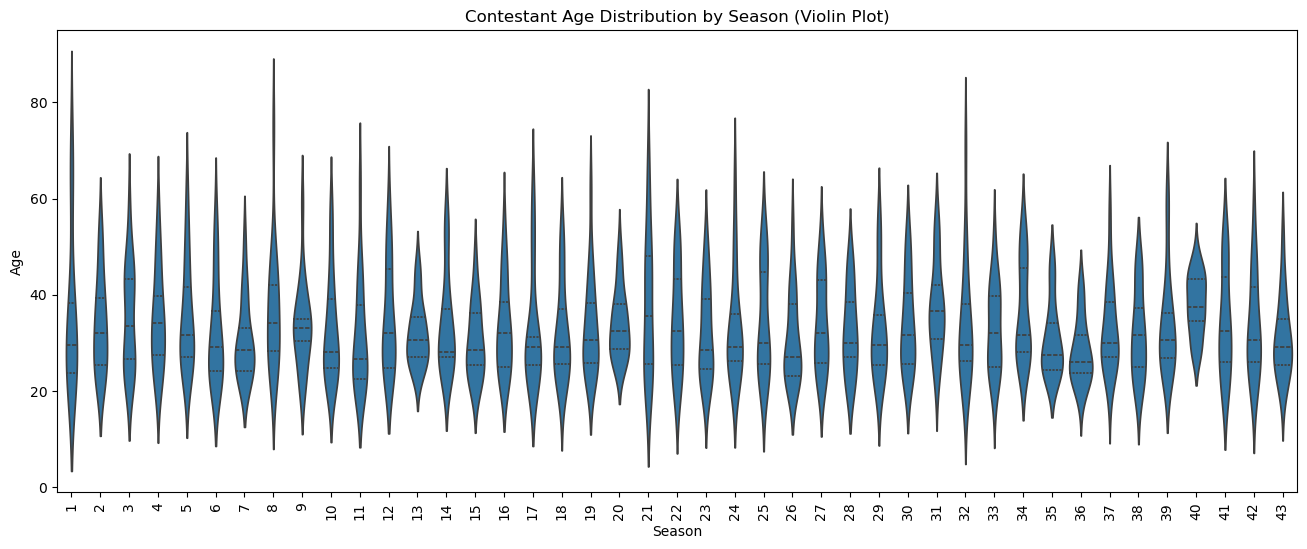

In [27]:
plt.figure(figsize = (16,6))
sns.violinplot(data = ct, x = 'num_season', y = 'age', inner = 'quartile')
plt.title('Contestant Age Distribution by Season (Violin Plot)')
plt.xlabel('Season')
plt.ylabel('Age')
plt.xticks(rotation = 90)
plt.show()

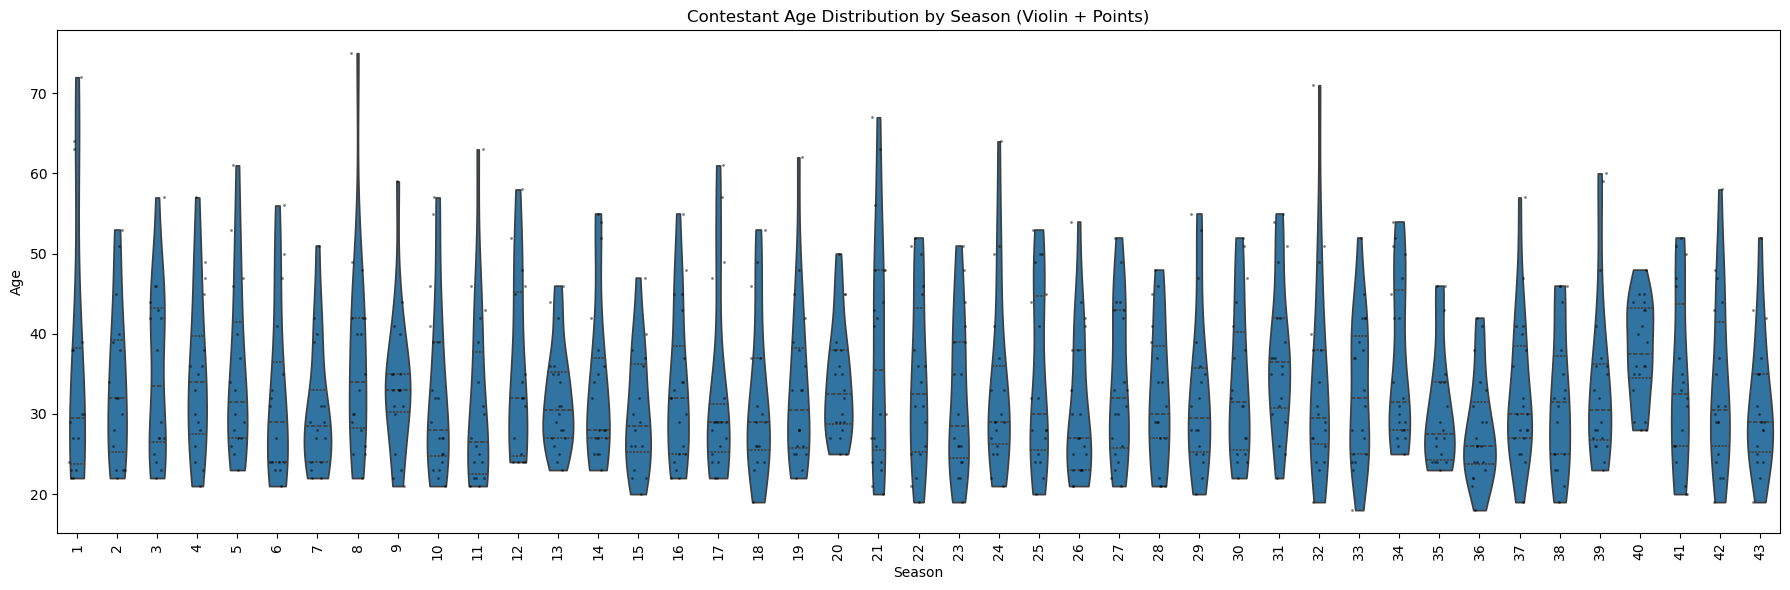

In [29]:
plt.figure(figsize = (18,6))
sns.violinplot(data = ct, x = 'num_season', y = 'age', inner = 'quartile', cut = 0)

# Add individual data points
sns.stripplot(data = ct, x = 'num_season', y = 'age', color = 'k', size = 2, jitter = 0.2, alpha = 0.5)

plt.title('Contestant Age Distribution by Season (Violin + Points)')
plt.xlabel('Season')
plt.ylabel('Age')
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

In [31]:
ct.to_csv('ct.csv', index = True)

In [33]:
ct.head(20)

,contestant_name,age,hometown,profession,num_season,finish,gender,african_american,asian_american,latin_american,...,num_boot,tribe1,tribe2,tribe3,quit,evac,ejected,fmc,num_jury_votes,normalized_finish
0,Sonja Christopher,63,"Walnut Creek, CA",Musician/Retired Teacher,1,16,F,0,0,0,...,1,Tagi,NaN,NaN,0,0,0,0,NaN,0.0000
1,B.B. Andersen,64,"Mission Hills, KS",Real Estate Developer,1,15,M,0,0,0,...,2,Pagong,NaN,NaN,0,0,0,0,NaN,0.0625
2,Stacey Stillman,27,"San Francisco, CA",Attorney,1,14,F,0,0,0,...,3,Tagi,NaN,NaN,0,0,0,0,NaN,0.1250
3,Ramona Gray,29,"Edison, NJ",Biochemist,1,13,F,1,0,0,...,4,Pagong,NaN,NaN,0,0,0,0,NaN,0.1875
4,Dirk Been,23,"Spring Green, WI",Dairy Farmer,1,12,M,0,0,0,...,5,Tagi,NaN,NaN,0,0,0,0,NaN,0.2500
5,Joel Klug,27,"Sherwood, AR",Health Club Consultant,1,11,M,0,0,0,...,6,Pagong,NaN,NaN,0,0,0,0,NaN,0.3125
6,Gretchen Cordy,38,"Clarksville, TN",Teacher,1,10,F,0,0,0,...,7,Pagong,NaN,NaN,0,0,0,0,NaN,0.3750
7,Greg Buis,24,"Gold Hill, CO",Ivy League Graduate,1,9,M,0,0,0,...,8,Pagong,NaN,NaN,0,0,0,0,NaN,0.4375
8,Jenna Lewis,22,"Franklin, NH",Student,1,8,F,0,0,0,...,9,Pagong,NaN,NaN,0,0,0,0,NaN,0.5000
9,Gervase Peterson,30,"Willingboro, NJ",YMCA Basketball Coach,1,7,M,1,0,0,...,10,Pagong,NaN,NaN,0,0,0,0,NaN,0.5625


In [35]:
ct.head(45)

,contestant_name,age,hometown,profession,num_season,finish,gender,african_american,asian_american,latin_american,...,num_boot,tribe1,tribe2,tribe3,quit,evac,ejected,fmc,num_jury_votes,normalized_finish
0,Sonja Christopher,63,"Walnut Creek, CA",Musician/Retired Teacher,1,16,F,0,0,0,...,1,Tagi,NaN,NaN,0,0,0,0,NaN,0.0000
1,B.B. Andersen,64,"Mission Hills, KS",Real Estate Developer,1,15,M,0,0,0,...,2,Pagong,NaN,NaN,0,0,0,0,NaN,0.0625
2,Stacey Stillman,27,"San Francisco, CA",Attorney,1,14,F,0,0,0,...,3,Tagi,NaN,NaN,0,0,0,0,NaN,0.1250
3,Ramona Gray,29,"Edison, NJ",Biochemist,1,13,F,1,0,0,...,4,Pagong,NaN,NaN,0,0,0,0,NaN,0.1875
4,Dirk Been,23,"Spring Green, WI",Dairy Farmer,1,12,M,0,0,0,...,5,Tagi,NaN,NaN,0,0,0,0,NaN,0.2500
5,Joel Klug,27,"Sherwood, AR",Health Club Consultant,1,11,M,0,0,0,...,6,Pagong,NaN,NaN,0,0,0,0,NaN,0.3125
6,Gretchen Cordy,38,"Clarksville, TN",Teacher,1,10,F,0,0,0,...,7,Pagong,NaN,NaN,0,0,0,0,NaN,0.3750
7,Greg Buis,24,"Gold Hill, CO",Ivy League Graduate,1,9,M,0,0,0,...,8,Pagong,NaN,NaN,0,0,0,0,NaN,0.4375
8,Jenna Lewis,22,"Franklin, NH",Student,1,8,F,0,0,0,...,9,Pagong,NaN,NaN,0,0,0,0,NaN,0.5000
9,Gervase Peterson,30,"Willingboro, NJ",YMCA Basketball Coach,1,7,M,1,0,0,...,10,Pagong,NaN,NaN,0,0,0,0,NaN,0.5625


In [101]:
vsp = pd.read_csv('Voting Stats Plus.csv')
vsp.head()

,id,playername,seasonplayed,age,occupation,hometown,startingtribe,startingtribecolor,timesswapped,mergetribe,...,finalplacement,votescast,correctlyvoted,votesrecieved,votesnegated,tribeimmunities,individualimmunites,tribalsattended,playersonseason,advantagesplayed
0,1,Sonja Christopher,Borneo,63,Musician,"Walnut Creek, CA",Tagi,Orange,0,No Merge,...,16,1,0,4,0,0,0,1,16,0.0
1,2,B.B. Anderson,Borneo,64,Real Estate Developer,"Mission Hills, KS",Pagong,Yellow,0,No Merge,...,15,1,0,6,0,1,0,1,16,0.0
2,3,Stacey Stillman,Borneo,27,Attorney,"San Francisco, CA",Tagi,Orange,0,No Merge,...,14,2,0,6,0,1,0,2,16,0.0
3,4,Ramona Gray,Borneo,29,Biochemist,"Edison, NJ",Pagong,Yellow,0,No Merge,...,13,2,1,6,0,2,0,2,16,0.0
4,5,Dirk Been,Borneo,23,Dairy Farmer,"Spring Green, WI",Tagi,Orange,0,No Merge,...,12,3,2,4,0,2,0,3,16,0.0


In [103]:
vsp.columns

Index(['id', 'playername', 'seasonplayed', 'age', 'occupation', 'hometown',
       'startingtribe', 'startingtribecolor', 'timesswapped', 'mergetribe',
       'mergetribecolor', 'finalplacement', 'votescast', 'correctlyvoted',
       'votesrecieved', 'votesnegated', 'tribeimmunities',
       'individualimmunites', 'tribalsattended', 'playersonseason',
       'advantagesplayed'],
      dtype='object')

In [105]:
vsp.shape

(857, 21)

In [107]:
vsp.describe()

,id,age,timesswapped,finalplacement,votescast,correctlyvoted,votesrecieved,votesnegated,tribeimmunities,individualimmunites,tribalsattended,playersonseason,advantagesplayed
count,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000,669.000000
mean,429.000000,33.009335,0.635939,9.674446,5.936989,3.938156,5.921820,0.278880,2.922987,0.500583,5.842474,18.302217,0.116592
std,247.538886,9.907984,0.639813,5.356253,3.945096,3.378001,3.383537,1.206654,1.762445,0.952278,3.845700,1.409549,0.411121
min,1.000000,18.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16.000000,0.000000
25%,215.000000,25.000000,0.000000,5.000000,2.000000,1.000000,4.000000,0.000000,2.000000,0.000000,2.000000,18.000000,0.000000
50%,429.000000,30.000000,1.000000,10.000000,5.000000,3.000000,6.000000,0.000000,3.000000,0.000000,5.000000,18.000000,0.000000
75%,643.000000,39.000000,1.000000,14.000000,9.000000,6.000000,8.000000,0.000000,4.000000,1.000000,9.000000,20.000000,0.000000
max,857.000000,75.000000,2.000000,20.000000,16.000000,15.000000,22.000000,12.000000,8.000000,5.000000,15.000000,20.000000,3.000000


In [109]:
vsp.dtypes

id                       int64
playername              object
seasonplayed            object
age                      int64
occupation              object
hometown                object
startingtribe           object
startingtribecolor      object
timesswapped             int64
mergetribe              object
mergetribecolor         object
finalplacement           int64
votescast                int64
correctlyvoted           int64
votesrecieved            int64
votesnegated             int64
tribeimmunities          int64
individualimmunites      int64
tribalsattended          int64
playersonseason          int64
advantagesplayed       float64
dtype: object

In [111]:
vsp.sample(10)

,id,playername,seasonplayed,age,occupation,hometown,startingtribe,startingtribecolor,timesswapped,mergetribe,...,finalplacement,votescast,correctlyvoted,votesrecieved,votesnegated,tribeimmunities,individualimmunites,tribalsattended,playersonseason,advantagesplayed
281,282,GC Brown,Gabon,25,Maintenance Man,"Portland, OR",Fang,Red,1,No Merge,...,14,4,3,6,0,1,0,4,18,0.0
37,38,Lindsey Richter,Africa,26,Advertising Executive,"Portland, OR",Samburu,Red,1,No Merge,...,11,3,2,12,0,3,0,3,16,0.0
469,470,Kat Edorsson,Blood vs. Water,23,Hayden's Girlfriend,"Orlando, FL",Galang,Yellow,1,No Merge,...,14,2,1,5,0,4,0,2,20,0.0
98,99,Michelle Tesauro,Pearl Islands,22,Student,"Washington, DC",Drake,Blue,0,No Merge,...,14,2,0,6,0,3,0,2,16,0.0
297,298,Jerry Sims,Tocantins,49,U.S. Army Sergeant,"Rock Hill, SC",Timbira,Black,0,No Merge,...,14,2,1,6,0,1,0,2,16,0.0
287,288,Randy Bailey,Gabon,49,Wedding Videographer,"Eagle Rock, MO",Fang,Red,2,Nobag,...,8,5,2,5,0,5,0,5,18,0.0
834,835,Maria Shrime Gonzalez,Survivor 46,47,Parent Coach,"Dallas, TX",Siga,Green,0,Nuinui,...,5,11,9,4,0,4,3,9,18,NaN
68,69,Stephanie Dill,Thailand,29,Firefighter,"Ozark, AR",Sook Jai,Purple,0,No Merge,...,12,2,0,5,0,3,0,2,16,0.0
340,341,Courtney Yates,Heroes vs. Villains,28,Returning Player,"New York City, NY",Villains,Red,0,No Merge,...,11,5,2,9,0,4,0,5,20,0.0
368,369,Sash Lenahan,Nicaragua,30,Real Estate Broker,"New York City, NY",La Flor,Yellow,1,Libertad,...,3,11,10,2,1,4,1,12,20,1.0


In [113]:
vsp['seasonplayed'] = vsp['seasonplayed'].replace('Millenials vs. Gen X', 'Millennials vs. Gen X')

In [115]:
vsp.seasonplayed.unique()

array(['Borneo', 'Australian Outback', 'Africa', 'Marquesas', 'Thailand',
       'The Amazon', 'Pearl Islands', 'All-Stars', 'Vanuatu', 'Palau',
       'Guatemala', 'Panama', 'Cook Islands', 'Fiji', 'China',
       'Micronesia', 'Gabon', 'Tocantins', 'Samoa', 'Heroes vs. Villains',
       'Nicaragua', 'Redemption Island', 'South Pacific', 'One World',
       'Philippines', 'Caramoan', 'Blood vs. Water', 'Cagayan',
       'San Juan del Sur', 'Worlds Apart', 'Cambodia', 'Kaôh Rōng',
       'Millennials vs. Gen X', 'Game Changers',
       'Heroes vs. Healers vs. Hustlers', 'Ghost Island',
       'David vs. Goliath', 'Edge of Extinction', 'Island of the Idols',
       'Winners at War', 'Survivor 41', 'Survivor 42', 'Survivor 43',
       'Survivor 44', 'Survivor 45', 'Survivor 46', 'Survivor 47'],
      dtype=object)

In [117]:
seasons = ['Borneo', 'Australian Outback', 'Africa', 'Marquesas', 'Thailand',
       'The Amazon', 'Pearl Islands', 'All-Stars', 'Vanuatu', 'Palau',
       'Guatemala', 'Panama', 'Cook Islands', 'Fiji', 'China',
       'Micronesia', 'Gabon', 'Tocantins', 'Samoa', 'Heroes vs. Villains',
       'Nicaragua', 'Redemption Island', 'South Pacific', 'One World',
       'Philippines', 'Caramoan', 'Blood vs. Water', 'Cagayan',
       'San Juan del Sur', 'Worlds Apart', 'Cambodia', 'Kaôh Rōng',
       'Millennials vs. Gen X', 'Game Changers',
       'Heroes vs. Healers vs. Hustlers', 'Ghost Island',
       'David vs. Goliath', 'Edge of Extinction', 'Island of the Idols',
       'Winners at War', 'Survivor 41', 'Survivor 42', 'Survivor 43',
       'Survivor 44', 'Survivor 45', 'Survivor 46', 'Survivor 47']

In [119]:
for a,b in enumerate(seasons, 1):
    print(a,b)

1 Borneo
2 Australian Outback
3 Africa
4 Marquesas
5 Thailand
6 The Amazon
7 Pearl Islands
8 All-Stars
9 Vanuatu
10 Palau
11 Guatemala
12 Panama
13 Cook Islands
14 Fiji
15 China
16 Micronesia
17 Gabon
18 Tocantins
19 Samoa
20 Heroes vs. Villains
21 Nicaragua
22 Redemption Island
23 South Pacific
24 One World
25 Philippines
26 Caramoan
27 Blood vs. Water
28 Cagayan
29 San Juan del Sur
30 Worlds Apart
31 Cambodia
32 Kaôh Rōng
33 Millennials vs. Gen X
34 Game Changers
35 Heroes vs. Healers vs. Hustlers
36 Ghost Island
37 David vs. Goliath
38 Edge of Extinction
39 Island of the Idols
40 Winners at War
41 Survivor 41
42 Survivor 42
43 Survivor 43
44 Survivor 44
45 Survivor 45
46 Survivor 46
47 Survivor 47


In [121]:
season_dict = dict(enumerate(seasons, 1))
season_dict

{1: 'Borneo',
 2: 'Australian Outback',
 3: 'Africa',
 4: 'Marquesas',
 5: 'Thailand',
 6: 'The Amazon',
 7: 'Pearl Islands',
 8: 'All-Stars',
 9: 'Vanuatu',
 10: 'Palau',
 11: 'Guatemala',
 12: 'Panama',
 13: 'Cook Islands',
 14: 'Fiji',
 15: 'China',
 16: 'Micronesia',
 17: 'Gabon',
 18: 'Tocantins',
 19: 'Samoa',
 20: 'Heroes vs. Villains',
 21: 'Nicaragua',
 22: 'Redemption Island',
 23: 'South Pacific',
 24: 'One World',
 25: 'Philippines',
 26: 'Caramoan',
 27: 'Blood vs. Water',
 28: 'Cagayan',
 29: 'San Juan del Sur',
 30: 'Worlds Apart',
 31: 'Cambodia',
 32: 'Kaôh Rōng',
 33: 'Millennials vs. Gen X',
 34: 'Game Changers',
 35: 'Heroes vs. Healers vs. Hustlers',
 36: 'Ghost Island',
 37: 'David vs. Goliath',
 38: 'Edge of Extinction',
 39: 'Island of the Idols',
 40: 'Winners at War',
 41: 'Survivor 41',
 42: 'Survivor 42',
 43: 'Survivor 43',
 44: 'Survivor 44',
 45: 'Survivor 45',
 46: 'Survivor 46',
 47: 'Survivor 47'}

In [123]:
season_dict.items()

dict_items([(1, 'Borneo'), (2, 'Australian Outback'), (3, 'Africa'), (4, 'Marquesas'), (5, 'Thailand'), (6, 'The Amazon'), (7, 'Pearl Islands'), (8, 'All-Stars'), (9, 'Vanuatu'), (10, 'Palau'), (11, 'Guatemala'), (12, 'Panama'), (13, 'Cook Islands'), (14, 'Fiji'), (15, 'China'), (16, 'Micronesia'), (17, 'Gabon'), (18, 'Tocantins'), (19, 'Samoa'), (20, 'Heroes vs. Villains'), (21, 'Nicaragua'), (22, 'Redemption Island'), (23, 'South Pacific'), (24, 'One World'), (25, 'Philippines'), (26, 'Caramoan'), (27, 'Blood vs. Water'), (28, 'Cagayan'), (29, 'San Juan del Sur'), (30, 'Worlds Apart'), (31, 'Cambodia'), (32, 'Kaôh Rōng'), (33, 'Millennials vs. Gen X'), (34, 'Game Changers'), (35, 'Heroes vs. Healers vs. Hustlers'), (36, 'Ghost Island'), (37, 'David vs. Goliath'), (38, 'Edge of Extinction'), (39, 'Island of the Idols'), (40, 'Winners at War'), (41, 'Survivor 41'), (42, 'Survivor 42'), (43, 'Survivor 43'), (44, 'Survivor 44'), (45, 'Survivor 45'), (46, 'Survivor 46'), (47, 'Survivor 47

In [125]:
# Invert the dictionary so season names become keys
invert_dict = {c: d for d, c in season_dict.items()}
invert_dict

{'Borneo': 1,
 'Australian Outback': 2,
 'Africa': 3,
 'Marquesas': 4,
 'Thailand': 5,
 'The Amazon': 6,
 'Pearl Islands': 7,
 'All-Stars': 8,
 'Vanuatu': 9,
 'Palau': 10,
 'Guatemala': 11,
 'Panama': 12,
 'Cook Islands': 13,
 'Fiji': 14,
 'China': 15,
 'Micronesia': 16,
 'Gabon': 17,
 'Tocantins': 18,
 'Samoa': 19,
 'Heroes vs. Villains': 20,
 'Nicaragua': 21,
 'Redemption Island': 22,
 'South Pacific': 23,
 'One World': 24,
 'Philippines': 25,
 'Caramoan': 26,
 'Blood vs. Water': 27,
 'Cagayan': 28,
 'San Juan del Sur': 29,
 'Worlds Apart': 30,
 'Cambodia': 31,
 'Kaôh Rōng': 32,
 'Millennials vs. Gen X': 33,
 'Game Changers': 34,
 'Heroes vs. Healers vs. Hustlers': 35,
 'Ghost Island': 36,
 'David vs. Goliath': 37,
 'Edge of Extinction': 38,
 'Island of the Idols': 39,
 'Winners at War': 40,
 'Survivor 41': 41,
 'Survivor 42': 42,
 'Survivor 43': 43,
 'Survivor 44': 44,
 'Survivor 45': 45,
 'Survivor 46': 46,
 'Survivor 47': 47}

In [127]:
# Map season names to season numbers
vsp['season_number'] = vsp['seasonplayed'].map(invert_dict)
vsp.head()

,id,playername,seasonplayed,age,occupation,hometown,startingtribe,startingtribecolor,timesswapped,mergetribe,...,votescast,correctlyvoted,votesrecieved,votesnegated,tribeimmunities,individualimmunites,tribalsattended,playersonseason,advantagesplayed,season_number
0,1,Sonja Christopher,Borneo,63,Musician,"Walnut Creek, CA",Tagi,Orange,0,No Merge,...,1,0,4,0,0,0,1,16,0.0,1
1,2,B.B. Anderson,Borneo,64,Real Estate Developer,"Mission Hills, KS",Pagong,Yellow,0,No Merge,...,1,0,6,0,1,0,1,16,0.0,1
2,3,Stacey Stillman,Borneo,27,Attorney,"San Francisco, CA",Tagi,Orange,0,No Merge,...,2,0,6,0,1,0,2,16,0.0,1
3,4,Ramona Gray,Borneo,29,Biochemist,"Edison, NJ",Pagong,Yellow,0,No Merge,...,2,1,6,0,2,0,2,16,0.0,1
4,5,Dirk Been,Borneo,23,Dairy Farmer,"Spring Green, WI",Tagi,Orange,0,No Merge,...,3,2,4,0,2,0,3,16,0.0,1


In [129]:
vsp.sample(20)

,id,playername,seasonplayed,age,occupation,hometown,startingtribe,startingtribecolor,timesswapped,mergetribe,...,votescast,correctlyvoted,votesrecieved,votesnegated,tribeimmunities,individualimmunites,tribalsattended,playersonseason,advantagesplayed,season_number
352,353,Shannon Elkins,Nicaragua,30,Pest Control Company Owner,"Lafayette, LA",La Flor,Yellow,0,No Merge,...,1,0,7,0,1,0,1,20,0.0,21
326,327,Jaison Robinson,Samoa,28,Law Student,"Chicago, IL",Foa Foa,Yellow,0,Aiga,...,14,13,7,0,1,2,13,20,0.0,19
646,647,Kellyn Bechtold,Ghost Island,30,Career Counselor,"Denver, CO",Naviti,Purple,2,Lavita,...,11,7,8,0,4,1,9,20,1.0,36
412,413,Colton Cumbie,One World,20,Student,"Monroeville, AL",Manono,Orange,1,No Merge,...,3,3,1,0,2,0,3,18,0.0,24
318,319,Liz Kim,Samoa,33,Urban Planner,"New York City, NY",Foa Foa,Yellow,0,No Merge,...,5,4,5,0,1,0,5,20,0.0,19
133,134,Mia Galeotalanza,Vanuatu,29,Bookkeeper,"Boston, MA",Yasur,Yellow,0,No Merge,...,2,0,5,0,2,0,1,18,0.0,9
446,447,Shamar Thomas,Caramoan,26,Iraq War Veteran,"Brooklyn, NY",Gota,Orange,0,No Merge,...,2,1,8,0,1,0,2,20,0.0,26
836,837,Ben Katzman,Survivor 46,31,Musician,"Miami, FL",Siga,Green,0,Nuinui,...,9,7,4,0,5,1,10,18,NaN,46
693,694,Vince Moua,Island of the Idols,27,Admissions Counselor,"Palo Alto, CA",Lairo,Orange,0,No Merge,...,2,1,7,0,1,0,2,18,NaN,39
357,358,Yve Rojas,Nicaragua,41,Homemaker,"Kansas City, MO",Espada,Blue,1,No Merge,...,5,3,7,0,1,0,5,20,0.0,21


In [131]:
vsp.shape

(857, 22)

In [137]:
vsp.columns

Index(['id', 'playername', 'seasonplayed', 'age', 'occupation', 'hometown',
       'startingtribe', 'startingtribecolor', 'timesswapped', 'mergetribe',
       'mergetribecolor', 'finalplacement', 'votescast', 'correctlyvoted',
       'votesrecieved', 'votesnegated', 'tribeimmunities',
       'individualimmunites', 'tribalsattended', 'playersonseason',
       'advantagesplayed', 'season_number'],
      dtype='object')

In [139]:
column_to_move = vsp.pop('playersonseason')
vsp.insert(12, 'playersonseason', column_to_move)
vsp.sample(10)

,id,playername,seasonplayed,age,occupation,hometown,startingtribe,startingtribecolor,timesswapped,mergetribe,...,playersonseason,votescast,correctlyvoted,votesrecieved,votesnegated,tribeimmunities,individualimmunites,tribalsattended,advantagesplayed,season_number
441,442,Micheal Skupin,Philippines,50,Returning Player,"White Lake, MI",Tandang,Yellow,1,Dangrayne,...,18,8,6,0,0,6,2,8,0.0,25
679,680,Julia Carter,Edge of Extinction,25,Medical Assistant,"Bethesda, MD",Kama,Yellow,1,Vata,...,18,3,2,9,0,6,0,3,NaN,38
359,360,Alina Wilson,Nicaragua,23,Art Student,"Downey, CA",La Flor,Yellow,1,Libertad,...,20,4,2,10,0,4,0,4,0.0,21
853,854,Teeny Chirichillo,Survivor 47,23,Freelance Writer,"Manahawkin, NJ",Lavo,Red,0,Beka,...,18,10,5,1,0,3,0,11,NaN,47
656,657,Bi Nguyen,David vs. Goliath,28,MMA Fighter,"Houston, TX",Vuku,Orange,0,No Merge,...,20,1,0,0,0,1,0,1,0.0,37
206,207,Stephannie Favor,Cook Islands,35,Nursing Student,"Columbia, SC",Manihiki,Yellow,1,No Merge,...,20,3,2,9,0,2,0,3,0.0,13
277,278,Michelle Chase,Gabon,24,Music Producer,"Los Angeles, CA",Fang,Red,0,No Merge,...,18,1,0,8,0,0,0,1,0.0,17
10,11,Colleen Haskell,Borneo,23,Student,"Miami Beach, FL",Pagong,Yellow,0,Rattana,...,16,8,3,7,0,3,0,8,0.0,1
373,374,Kristina Kell,Redemption Island,45,Law Student,"Malibu, CA",Ometepe,Orange,0,No Merge,...,18,3,0,9,2,1,0,3,1.0,22
703,704,Karishma Patel,Island of the Idols,37,Personal Injury Lawyer,"Houston, TX",Lairo,Orange,1,Lumuwaku,...,18,11,6,22,7,2,0,10,NaN,39


In [141]:
vsp.columns

Index(['id', 'playername', 'seasonplayed', 'age', 'occupation', 'hometown',
       'startingtribe', 'startingtribecolor', 'timesswapped', 'mergetribe',
       'mergetribecolor', 'finalplacement', 'playersonseason', 'votescast',
       'correctlyvoted', 'votesrecieved', 'votesnegated', 'tribeimmunities',
       'individualimmunites', 'tribalsattended', 'advantagesplayed',
       'season_number'],
      dtype='object')

In [143]:
columns_to_drop = ['startingtribecolor', 'mergetribecolor']

vsp.drop(columns = columns_to_drop, axis = 1, inplace = True)

vsp.columns

Index(['id', 'playername', 'seasonplayed', 'age', 'occupation', 'hometown',
       'startingtribe', 'timesswapped', 'mergetribe', 'finalplacement',
       'playersonseason', 'votescast', 'correctlyvoted', 'votesrecieved',
       'votesnegated', 'tribeimmunities', 'individualimmunites',
       'tribalsattended', 'advantagesplayed', 'season_number'],
      dtype='object')

In [145]:
vsp.shape

(857, 20)

In [147]:
column_to_move = vsp.pop('season_number')
vsp.insert(2, 'season_number', column_to_move)
vsp.sample(10)

,id,playername,season_number,seasonplayed,age,occupation,hometown,startingtribe,timesswapped,mergetribe,finalplacement,playersonseason,votescast,correctlyvoted,votesrecieved,votesnegated,tribeimmunities,individualimmunites,tribalsattended,advantagesplayed
273,274,Natalie Bolton,16,Micronesia,31,Personal Trainer,"West Hollywood, CA",Airai,1,Dabu,4,20,9,7,3,0,6,1,8,0.0
168,169,Jim Lynch,11,Guatemala,63,Retired Fire Captain,"Northglenn, CO",Nakúm,0,No Merge,18,18,1,0,8,0,0,0,1,0.0
407,408,Kourtney Moon,24,One World,29,Motorcycle Repairwoman,"Austin, TX",Salani,0,No Merge,18,18,0,0,0,0,0,0,0,0.0
305,306,Debbie Beebe,18,Tocantins,46,School Principal,"Auburn, AL",Timbira,0,Forza,6,16,6,4,6,0,4,1,6,0.0
519,520,So Kim,30,Worlds Apart,31,Retail Buyer,"Long Beach, CA",Masaya,0,No Merge,18,18,1,0,4,0,0,0,1,0.0
289,290,Crystal Cox,17,Gabon,29,Olympic Gold Medalist,"Durham, NC",Fang,2,Nobag,6,18,11,10,11,0,1,0,11,0.0
598,599,Malcolm Freberg,34,Game Changers,29,Returning Player,"Hermosa Beach, CA",Mana,1,No Merge,17,20,3,2,5,0,1,0,3,0.0
132,133,John Palyok,9,Vanuatu,31,Sales Manager,"Los Angeles, CA",Lopevi,0,No Merge,16,18,2,0,5,0,1,0,1,0.0
122,123,Kathy Vavrick-O'Brien,8,All-Stars,48,Returning Player,"Burlington, VA",Mogo Mogo,2,Chaboga Mogo,8,18,5,3,6,0,3,2,5,0.0
222,223,Jessica deBen,14,Fiji,27,Fashion Stylist,"Los Angeles, CA",Ravu,0,No Merge,19,19,1,0,6,0,0,0,1,0.0


In [149]:
vsp['normalized_finish'] = 1 - (vsp['finalplacement'] - 1) / vsp['playersonseason']
vsp.head()

,id,playername,season_number,seasonplayed,age,occupation,hometown,startingtribe,timesswapped,mergetribe,...,playersonseason,votescast,correctlyvoted,votesrecieved,votesnegated,tribeimmunities,individualimmunites,tribalsattended,advantagesplayed,normalized_finish
0,1,Sonja Christopher,1,Borneo,63,Musician,"Walnut Creek, CA",Tagi,0,No Merge,...,16,1,0,4,0,0,0,1,0.0,0.0625
1,2,B.B. Anderson,1,Borneo,64,Real Estate Developer,"Mission Hills, KS",Pagong,0,No Merge,...,16,1,0,6,0,1,0,1,0.0,0.1250
2,3,Stacey Stillman,1,Borneo,27,Attorney,"San Francisco, CA",Tagi,0,No Merge,...,16,2,0,6,0,1,0,2,0.0,0.1875
3,4,Ramona Gray,1,Borneo,29,Biochemist,"Edison, NJ",Pagong,0,No Merge,...,16,2,1,6,0,2,0,2,0.0,0.2500
4,5,Dirk Been,1,Borneo,23,Dairy Farmer,"Spring Green, WI",Tagi,0,No Merge,...,16,3,2,4,0,2,0,3,0.0,0.3125


In [151]:
vsp.columns

Index(['id', 'playername', 'season_number', 'seasonplayed', 'age',
       'occupation', 'hometown', 'startingtribe', 'timesswapped', 'mergetribe',
       'finalplacement', 'playersonseason', 'votescast', 'correctlyvoted',
       'votesrecieved', 'votesnegated', 'tribeimmunities',
       'individualimmunites', 'tribalsattended', 'advantagesplayed',
       'normalized_finish'],
      dtype='object')

In [153]:
column_to_move = vsp.pop('normalized_finish')
vsp.insert(11, 'normalized_finish', column_to_move)
vsp[['normalized_finish', 'finalplacement']]

,normalized_finish,finalplacement
0,0.062500,16
1,0.125000,15
2,0.187500,14
3,0.250000,13
4,0.312500,12
...,...,...
852,0.777778,5
853,0.833333,4
854,0.888889,3
855,0.944444,2


In [155]:
vsp.shape

(857, 21)

In [157]:
vsp.columns

Index(['id', 'playername', 'season_number', 'seasonplayed', 'age',
       'occupation', 'hometown', 'startingtribe', 'timesswapped', 'mergetribe',
       'finalplacement', 'normalized_finish', 'playersonseason', 'votescast',
       'correctlyvoted', 'votesrecieved', 'votesnegated', 'tribeimmunities',
       'individualimmunites', 'tribalsattended', 'advantagesplayed'],
      dtype='object')

In [159]:
vsp['accuracy_rate'] = (vsp['correctlyvoted'] / vsp['votescast'])
vsp.head(10)

,id,playername,season_number,seasonplayed,age,occupation,hometown,startingtribe,timesswapped,mergetribe,...,playersonseason,votescast,correctlyvoted,votesrecieved,votesnegated,tribeimmunities,individualimmunites,tribalsattended,advantagesplayed,accuracy_rate
0,1,Sonja Christopher,1,Borneo,63,Musician,"Walnut Creek, CA",Tagi,0,No Merge,...,16,1,0,4,0,0,0,1,0.0,0.000000
1,2,B.B. Anderson,1,Borneo,64,Real Estate Developer,"Mission Hills, KS",Pagong,0,No Merge,...,16,1,0,6,0,1,0,1,0.0,0.000000
2,3,Stacey Stillman,1,Borneo,27,Attorney,"San Francisco, CA",Tagi,0,No Merge,...,16,2,0,6,0,1,0,2,0.0,0.000000
3,4,Ramona Gray,1,Borneo,29,Biochemist,"Edison, NJ",Pagong,0,No Merge,...,16,2,1,6,0,2,0,2,0.0,0.500000
4,5,Dirk Been,1,Borneo,23,Dairy Farmer,"Spring Green, WI",Tagi,0,No Merge,...,16,3,2,4,0,2,0,3,0.0,0.666667
5,6,Joel Klug,1,Borneo,27,Health Club Consultant,"Sherwood, AR",Pagong,0,No Merge,...,16,3,2,4,0,3,0,3,0.0,0.666667
6,7,Gretchen Cordy,1,Borneo,38,Teacher,"Clarksville, TN",Pagong,0,Rattana,...,16,4,3,4,0,3,0,4,0.0,0.750000
7,8,Greg Buis,1,Borneo,24,Ivy League Graduate,"Gold Hill, CO",Pagong,0,Rattana,...,16,5,1,6,0,3,1,5,0.0,0.200000
8,9,Jenna Lewis,1,Borneo,22,Student,"Franklin, NH",Pagong,0,Rattana,...,16,6,4,11,0,3,0,6,0.0,0.666667
9,10,Gervase Peterson,1,Borneo,30,YMCA Basketball Coach,"Willingboro, NJ",Pagong,0,Rattana,...,16,7,1,6,0,3,1,7,0.0,0.142857


In [161]:
column_to_move = vsp.pop('accuracy_rate')
vsp.insert(13, 'accuracy_rate', column_to_move)
vsp.head()

,id,playername,season_number,seasonplayed,age,occupation,hometown,startingtribe,timesswapped,mergetribe,...,playersonseason,accuracy_rate,votescast,correctlyvoted,votesrecieved,votesnegated,tribeimmunities,individualimmunites,tribalsattended,advantagesplayed
0,1,Sonja Christopher,1,Borneo,63,Musician,"Walnut Creek, CA",Tagi,0,No Merge,...,16,0.000000,1,0,4,0,0,0,1,0.0
1,2,B.B. Anderson,1,Borneo,64,Real Estate Developer,"Mission Hills, KS",Pagong,0,No Merge,...,16,0.000000,1,0,6,0,1,0,1,0.0
2,3,Stacey Stillman,1,Borneo,27,Attorney,"San Francisco, CA",Tagi,0,No Merge,...,16,0.000000,2,0,6,0,1,0,2,0.0
3,4,Ramona Gray,1,Borneo,29,Biochemist,"Edison, NJ",Pagong,0,No Merge,...,16,0.500000,2,1,6,0,2,0,2,0.0
4,5,Dirk Been,1,Borneo,23,Dairy Farmer,"Spring Green, WI",Tagi,0,No Merge,...,16,0.666667,3,2,4,0,2,0,3,0.0


In [165]:
vsp.tail(10)

,id,playername,season_number,seasonplayed,age,occupation,hometown,startingtribe,timesswapped,mergetribe,...,playersonseason,accuracy_rate,votescast,correctlyvoted,votesrecieved,votesnegated,tribeimmunities,individualimmunites,tribalsattended,advantagesplayed
847,848,Sol Yi,47,Survivor 47,42,Medical Device Salesman,"Norwalk, CT",Lavo,0,Beka,...,18,0.333333,6,2,9,0,3,0,5,NaN
848,849,Gabe Ortiz,47,Survivor 47,26,Radio Show Host,"Baltimore, MD",Tuku,0,Beka,...,18,0.857143,7,6,9,0,4,1,6,NaN
849,850,Kyle Ostwald,47,Survivor 47,31,Construction Worker,"Cheboygan, MI",Tuku,0,Beka,...,18,0.714286,7,5,6,0,4,4,7,NaN
850,851,Caroline Vidmar,47,Survivor 47,27,Strategy Consultant,"Chicago, IL",Tuku,0,Beka,...,18,0.875000,8,7,3,0,4,0,8,NaN
851,852,Andy Rueda,47,Survivor 47,31,AI Research Assistant,"Brooklyn, NY",Gata,0,Beka,...,18,0.700000,10,7,5,0,3,0,9,NaN
852,853,Genevieve Mushaluk,47,Survivor 47,32,Corporate Lawyer,"Winnipeg, MB",Lavo,0,Beka,...,18,0.727273,11,8,9,0,3,1,10,NaN
853,854,Teeny Chirichillo,47,Survivor 47,23,Freelance Writer,"Manahawkin, NJ",Lavo,0,Beka,...,18,0.500000,10,5,1,0,3,0,11,NaN
854,855,Sue Smey,47,Survivor 47,58,Flight School Owner,"Putnam Valley, NY",Tuku,0,Beka,...,18,0.727273,11,8,3,0,4,1,11,NaN
855,856,Sam Phalen,47,Survivor 47,24,Sports Reporter,"Nashville, TN",Gata,0,Beka,...,18,1.000000,8,8,10,0,3,0,11,NaN
856,857,Rachel LaMont,47,Survivor 47,34,Graphic Designer,"Southfield, MI",Gata,0,Beka,...,18,0.777778,9,7,3,3,3,4,12,NaN


In [169]:
vsp.to_csv('vsp_2025.04.07.csv', index = False)

# Restarting Here After 8p

In [21]:
vsp = pd.read_csv('vsp_2025.04.07.csv')
vsp.head()

,id,playername,season_number,seasonplayed,age,occupation,hometown,startingtribe,timesswapped,mergetribe,...,playersonseason,accuracy_rate,votescast,correctlyvoted,votesrecieved,votesnegated,tribeimmunities,individualimmunites,tribalsattended,advantagesplayed
0,1,Sonja Christopher,1,Borneo,63,Musician,"Walnut Creek, CA",Tagi,0,No Merge,...,16,0.000000,1,0,4,0,0,0,1,0.0
1,2,B.B. Anderson,1,Borneo,64,Real Estate Developer,"Mission Hills, KS",Pagong,0,No Merge,...,16,0.000000,1,0,6,0,1,0,1,0.0
2,3,Stacey Stillman,1,Borneo,27,Attorney,"San Francisco, CA",Tagi,0,No Merge,...,16,0.000000,2,0,6,0,1,0,2,0.0
3,4,Ramona Gray,1,Borneo,29,Biochemist,"Edison, NJ",Pagong,0,No Merge,...,16,0.500000,2,1,6,0,2,0,2,0.0
4,5,Dirk Been,1,Borneo,23,Dairy Farmer,"Spring Green, WI",Tagi,0,No Merge,...,16,0.666667,3,2,4,0,2,0,3,0.0


In [23]:
vsp.columns

Index(['id', 'playername', 'season_number', 'seasonplayed', 'age',
       'occupation', 'hometown', 'startingtribe', 'timesswapped', 'mergetribe',
       'finalplacement', 'normalized_finish', 'playersonseason',
       'accuracy_rate', 'votescast', 'correctlyvoted', 'votesrecieved',
       'votesnegated', 'tribeimmunities', 'individualimmunites',
       'tribalsattended', 'advantagesplayed'],
      dtype='object')

In [25]:
vsp.rename(columns = {'id': 'Unique ID / Index', 'playername': 'Name', 'season_number': 'Season No.', 'seasonplayed': 'Season', 'age': 'Age', 'occupation': 'Occupation', 'hometown': 'Hometown', 'startingtribe': 'Starting Tribe', 'timesswapped': 'Times Swapped', 'mergetribe': 'Merge Tribe', 'finalplacement': 'Final Placement', 'normalized_finish': 'Normalized Finish', 'playersonseason': '# Castaways on Season', 'accuracy_rate': 'Accuracy Rate', 'votescast': 'Votes Cast', 'correctlyvoted': 'Correctly Voted', 'votesrecieved': 'Votes Received', 'votesnegated': 'Votes Negated', 'tribeimmunities': 'Tribe Immunities', 'individualimmunities': 'Individual Immunities', 'tribalsattended': 'Tribals Attended', 'advantagesplayed': 'Advantages Played'}, inplace = True)

In [27]:
vsp.columns

Index(['Unique ID / Index', 'Name', 'Season No.', 'Season', 'Age',
       'Occupation', 'Hometown', 'Starting Tribe', 'Times Swapped',
       'Merge Tribe', 'Final Placement', 'Normalized Finish',
       '# Castaways on Season', 'Accuracy Rate', 'Votes Cast',
       'Correctly Voted', 'Votes Received', 'Votes Negated',
       'Tribe Immunities', 'individualimmunites', 'Tribals Attended',
       'Advantages Played'],
      dtype='object')

In [29]:
vsp.rename(columns = {'individualimmunites': 'Individual Immunities'}, inplace = True)
vsp.columns

Index(['Unique ID / Index', 'Name', 'Season No.', 'Season', 'Age',
       'Occupation', 'Hometown', 'Starting Tribe', 'Times Swapped',
       'Merge Tribe', 'Final Placement', 'Normalized Finish',
       '# Castaways on Season', 'Accuracy Rate', 'Votes Cast',
       'Correctly Voted', 'Votes Received', 'Votes Negated',
       'Tribe Immunities', 'Individual Immunities', 'Tribals Attended',
       'Advantages Played'],
      dtype='object')

In [31]:
# Filter for winners (Normalized Finish == 1)
winners = vsp[vsp['Normalized Finish'] == 1]

# Sort by 'Tribals Attended' in descending order (or ascending if you prefer fewer tribals is better)
winners_sorted = winners.sort_values(by = 'Tribals Attended', ascending = False).reset_index(drop = True)

# Add a rank column if you want to see the ranking explicitly
winners_sorted['Rank by Tribals'] = winners_sorted['Tribals Attended'].rank(method = 'min', ascending = False).astype(int)

winners_sorted.head(10)

,Unique ID / Index,Name,Season No.,Season,Age,Occupation,Hometown,Starting Tribe,Times Swapped,Merge Tribe,...,Accuracy Rate,Votes Cast,Correctly Voted,Votes Received,Votes Negated,Tribe Immunities,Individual Immunities,Tribals Attended,Advantages Played,Rank by Tribals
0,331,Natalie White,19,Samoa,26,Pharmaceutical Saleswoman,"Van Buren, AR",Foa Foa,0,Aiga,...,1.000000,14,14,8,0,1,0,14,0.0,1
1,443,Denise Stapley,25,Philippines,41,Sex Therapist,"Cedar Rapids, IA",Matsing,1,Dangrayne,...,0.785714,14,11,6,0,0,1,14,0.0,1
2,389,Rob Mariano,22,Redemption Island,34,Returning Player,"Pensacola, FL",Ometepe,0,Murlonio,...,0.923077,13,12,7,1,4,4,13,1.0,3
3,731,Tony Vlachos,40,Winners at War,45,Returning Winner,"Allendale, NJ",Dakal,1,Koru,...,0.692308,13,9,0,0,5,4,13,NaN,3
4,673,Nick Wilson,37,David vs. Goliath,27,Public Defender,"Williamsburg, KY",Vuku,1,Kalokalo,...,0.769231,13,10,0,0,2,3,13,NaN,3
5,407,Sophie Clarke,23,South Pacific,21,Medical Student,"Willsboro, NY",Upolu,0,Te Tuna,...,0.857143,14,12,5,0,4,3,13,0.0,3
6,186,Danni Boatwright,11,Guatemala,29,Sports Radio Host,"Tonganoxie, KS",Nakúm,1,Xhakúm,...,0.833333,12,10,1,0,3,2,12,0.0,7
7,371,Fabio Birza,21,Nicaragua,21,Student,"Venice, CA",La Flor,1,Libertad,...,0.636364,11,7,2,0,4,4,12,0.0,7
8,351,Sandra Diaz-Twine,20,Heroes vs. Villains,35,Returning Player,"Fayetteville, NC",Villains,0,Yin Yang,...,0.750000,12,9,3,2,4,0,12,1.0,7
9,463,John Cochran,26,Caramoan,25,Returning Player,"Washington, DC",Bikal,1,Enil Edam,...,0.785714,14,11,0,0,3,3,12,0.0,7


In [33]:
vsp.to_csv('vsp_2025.04.07_v2.csv', index = False)

In [35]:
winners_sorted.to_csv('winners_sorted.csv', index = False)

In [45]:
vsp.rename(columns = {'Accuracy Rate': 'In Majority'}, inplace = True)
vsp.columns

Index(['Unique ID / Index', 'Name', 'Season No.', 'Season', 'Age',
       'Occupation', 'Hometown', 'Starting Tribe', 'Times Swapped',
       'Merge Tribe', 'Final Placement', 'Normalized Finish',
       '# Castaways on Season', 'In Majority', 'Votes Cast', 'Correctly Voted',
       'Votes Received', 'Votes Negated', 'Tribe Immunities',
       'Individual Immunities', 'Tribals Attended', 'Advantages Played'],
      dtype='object')

In [47]:
vsp.rename(columns = {'In Majority': 'Rate In Majority'}, inplace = True)
vsp.columns

Index(['Unique ID / Index', 'Name', 'Season No.', 'Season', 'Age',
       'Occupation', 'Hometown', 'Starting Tribe', 'Times Swapped',
       'Merge Tribe', 'Final Placement', 'Normalized Finish',
       '# Castaways on Season', 'Rate In Majority', 'Votes Cast',
       'Correctly Voted', 'Votes Received', 'Votes Negated',
       'Tribe Immunities', 'Individual Immunities', 'Tribals Attended',
       'Advantages Played'],
      dtype='object')

In [49]:
winners_sorted.rename(columns = {'Accuracy Rate': 'Rate In Majority'}, inplace = True)
winners_sorted.columns

Index(['Unique ID / Index', 'Name', 'Season No.', 'Season', 'Age',
       'Occupation', 'Hometown', 'Starting Tribe', 'Times Swapped',
       'Merge Tribe', 'Final Placement', 'Normalized Finish',
       '# Castaways on Season', 'Rate In Majority', 'Votes Cast',
       'Correctly Voted', 'Votes Received', 'Votes Negated',
       'Tribe Immunities', 'Individual Immunities', 'Tribals Attended',
       'Advantages Played', 'Rank by Tribals'],
      dtype='object')

In [53]:
winners_sorted[['Name', 'Season', 'Age', 'Rate In Majority', 'Tribals Attended', 'Rank by Tribals']]

,Name,Season,Age,Rate In Majority,Tribals Attended,Rank by Tribals
0,Natalie White,Samoa,26,1.000000,14,1
1,Denise Stapley,Philippines,41,0.785714,14,1
2,Rob Mariano,Redemption Island,34,0.923077,13,3
3,Tony Vlachos,Winners at War,45,0.692308,13,3
4,Nick Wilson,David vs. Goliath,27,0.769231,13,3
5,Sophie Clarke,South Pacific,21,0.857143,13,3
6,Danni Boatwright,Guatemala,29,0.833333,12,7
7,Fabio Birza,Nicaragua,21,0.636364,12,7
8,Sandra Diaz-Twine,Heroes vs. Villains,35,0.750000,12,7
9,John Cochran,Caramoan,25,0.785714,12,7


In [61]:
winners = vsp[vsp['Normalized Finish'] == 1]

In [65]:
winners.columns

Index(['Unique ID / Index', 'Name', 'Season No.', 'Season', 'Age',
       'Occupation', 'Hometown', 'Starting Tribe', 'Times Swapped',
       'Merge Tribe', 'Final Placement', 'Normalized Finish',
       '# Castaways on Season', 'Rate In Majority', 'Votes Cast',
       'Correctly Voted', 'Votes Received', 'Votes Negated',
       'Tribe Immunities', 'Individual Immunities', 'Tribals Attended',
       'Advantages Played'],
      dtype='object')

In [71]:
winners.head()

,Unique ID / Index,Name,Season No.,Season,Age,Occupation,Hometown,Starting Tribe,Times Swapped,Merge Tribe,...,# Castaways on Season,Rate In Majority,Votes Cast,Correctly Voted,Votes Received,Votes Negated,Tribe Immunities,Individual Immunities,Tribals Attended,Advantages Played
15,16,Richard Hatch,1,Borneo,38,Corporate Trainer,"Newport, RI",Tagi,0,Rattana,...,16,0.900000,10,9,6,0,3,1,11,0.0
31,32,Tina Wesson,2,Australian Outback,39,Personal Nurse,"Knoxville, TN",Ogakor,0,Barramundi,...,16,1.000000,12,12,0,0,3,0,11,0.0
47,48,Ethan Zohn,3,Africa,27,Professional Soccer Player,"New York City, NY",Boran,1,Moto Maji,...,16,1.000000,10,10,0,0,3,1,11,0.0
63,64,Vecepia Towery,4,Marquesas,35,Office Manager,"Hayward, CA",Maraamu,1,Soliantu,...,16,0.818182,11,9,2,0,2,2,12,0.0
79,80,Brian Heidik,5,Thailand,34,Used Car Salesman,"Quartz Hill, CA",Chuay Gahn,0,Chuay Jai,...,16,1.000000,9,9,0,0,5,3,9,0.0


In [75]:
# Filter for winners
winners2 = vsp[vsp['Normalized Finish'] == 1].copy()

# Sort by 'Tribals Attended' (descending), then by 'Rate in Majority' (descending)
winners2_sorted = winners2.sort_values(
    by = ['Tribals Attended', 'Rate In Majority'],
    ascending = [False, False]
).reset_index(drop = True)

winners2_sorted

,Unique ID / Index,Name,Season No.,Season,Age,Occupation,Hometown,Starting Tribe,Times Swapped,Merge Tribe,...,# Castaways on Season,Rate In Majority,Votes Cast,Correctly Voted,Votes Received,Votes Negated,Tribe Immunities,Individual Immunities,Tribals Attended,Advantages Played
0,331,Natalie White,19,Samoa,26,Pharmaceutical Saleswoman,"Van Buren, AR",Foa Foa,0,Aiga,...,20,1.000000,14,14,8,0,1,0,14,0.0
1,443,Denise Stapley,25,Philippines,41,Sex Therapist,"Cedar Rapids, IA",Matsing,1,Dangrayne,...,18,0.785714,14,11,6,0,0,1,14,0.0
2,389,Rob Mariano,22,Redemption Island,34,Returning Player,"Pensacola, FL",Ometepe,0,Murlonio,...,18,0.923077,13,12,7,1,4,4,13,1.0
3,407,Sophie Clarke,23,South Pacific,21,Medical Student,"Willsboro, NY",Upolu,0,Te Tuna,...,18,0.857143,14,12,5,0,4,3,13,0.0
4,673,Nick Wilson,37,David vs. Goliath,27,Public Defender,"Williamsburg, KY",Vuku,1,Kalokalo,...,20,0.769231,13,10,0,0,2,3,13,NaN
5,731,Tony Vlachos,40,Winners at War,45,Returning Winner,"Allendale, NJ",Dakal,1,Koru,...,20,0.692308,13,9,0,0,5,4,13,NaN
6,615,Sarah Lacina,34,Game Changers,31,Returning Player,"Marion, IA",Nuku,2,Maku Maku,...,20,0.923077,13,12,3,3,5,0,12,2.0
7,112,Sandra Diaz-Twine,7,Pearl Islands,29,Office Assistant,"Fort Lewis, WA",Drake,0,Balboa,...,16,0.909091,11,10,0,0,3,0,12,0.0
8,148,Chris Daugherty,9,Vanuatu,33,Highway Construction Worker,"South Vienna, OH",Lopevi,1,Alinta,...,18,0.833333,12,10,3,0,3,3,12,0.0
9,186,Danni Boatwright,11,Guatemala,29,Sports Radio Host,"Tonganoxie, KS",Nakúm,1,Xhakúm,...,18,0.833333,12,10,1,0,3,2,12,0.0


In [77]:
winners2_sorted[['Name', 'Season No.', 'Season', 'Age', 'Tribals Attended', 'Rate In Majority']]

,Name,Season No.,Season,Age,Tribals Attended,Rate In Majority
0,Natalie White,19,Samoa,26,14,1.000000
1,Denise Stapley,25,Philippines,41,14,0.785714
2,Rob Mariano,22,Redemption Island,34,13,0.923077
3,Sophie Clarke,23,South Pacific,21,13,0.857143
4,Nick Wilson,37,David vs. Goliath,27,13,0.769231
5,Tony Vlachos,40,Winners at War,45,13,0.692308
6,Sarah Lacina,34,Game Changers,31,12,0.923077
7,Sandra Diaz-Twine,7,Pearl Islands,29,12,0.909091
8,Chris Daugherty,9,Vanuatu,33,12,0.833333
9,Danni Boatwright,11,Guatemala,29,12,0.833333


In [79]:
winners2_sorted.to_csv('winners_sorted_v2.csv', index = False)

In [81]:
vsp.to_csv('vsp_2025.04.07_v3.csv', index = False)

# Restart Work at 9:34p (2025.04.07)

In [6]:
vsp = pd.read_csv('vsp_2025.04.07_v3.csv')
winners = pd.read_csv('winners_sorted_v2.csv')

In [8]:
# URL of the Survivor 48 Wikipedia page
url = 'https://en.wikipedia.org/wiki/Survivor_48'

# Send a GET request to the URL
response = requests.get(url)
response.raise_for_status()  # Ensure the request was successful

In [10]:
# Parse the HTML content
soup = BeautifulSoup(response.text, 'html.parser')

In [12]:
# Find the table containing contestant information
# This assumes the table has a specific class or id; adjust as necessary
table = soup.find('table', {'class': 'wikitable'})

# Read the HTML table into a DataFrame
season_48_df = pd.read_html(str(table))[0]

# Display the first few rows to verify
print(season_48_df.head())

          Contestant Age                     From    Tribe                \
          Contestant Age                     From Original Switched None   
0   Stephanie Berger  38       Brooklyn, New York     Vula      NaN  NaN   
1        Kevin Leung  34    Livermore, California     Vula      NaN  NaN   
2      Justin Pioppi  29  Winthrop, Massachusetts     Vula      NaN  NaN   
3  Thomas Krottinger  34  Los Angeles, California     Lagi     Vula  NaN   
4       Bianca Roses  33      Arlington, Virginia     Lagi     Civa  NaN   

                 Finish          
  Merged      Placement     Day  
0    NaN  1st voted out   Day 3  
1    NaN  2nd voted out   Day 5  
2    NaN  3rd voted out   Day 7  
3    NaN  4th voted out   Day 9  
4    NaN  5th voted out  Day 11  


C:\Users\natal\AppData\Local\Temp\ipykernel_4216\2458129670.py:6: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  season_48_df = pd.read_html(str(table))[0]


In [14]:
season_48_df.head()

Contestant Age                     From    Tribe                \
          Contestant Age                     From Original Switched None   
0   Stephanie Berger  38       Brooklyn, New York     Vula      NaN  NaN   
1        Kevin Leung  34    Livermore, California     Vula      NaN  NaN   
2      Justin Pioppi  29  Winthrop, Massachusetts     Vula      NaN  NaN   
3  Thomas Krottinger  34  Los Angeles, California     Lagi     Vula  NaN   
4       Bianca Roses  33      Arlington, Virginia     Lagi     Civa  NaN   

                 Finish          
  Merged      Placement     Day  
0    NaN  1st voted out   Day 3  
1    NaN  2nd voted out   Day 5  
2    NaN  3rd voted out   Day 7  
3    NaN  4th voted out   Day 9  
4    NaN  5th voted out  Day 11

In [16]:
season_48_df.shape

(18, 9)

In [18]:
s48 = season_48_df

In [20]:
s48.columns

MultiIndex([('Contestant', 'Contestant'),
            (       'Age',        'Age'),
            (      'From',       'From'),
            (     'Tribe',   'Original'),
            (     'Tribe',   'Switched'),
            (     'Tribe',       'None'),
            (     'Tribe',     'Merged'),
            (    'Finish',  'Placement'),
            (    'Finish',        'Day')],
           )

In [22]:
s48 = pd.read_html(str(table))[0]

C:\Users\natal\AppData\Local\Temp\ipykernel_4216\260841543.py:1: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  s48 = pd.read_html(str(table))[0]


In [24]:
s48

Contestant Age                         From    Tribe           \
            Contestant Age                         From Original Switched   
0     Stephanie Berger  38           Brooklyn, New York     Vula      NaN   
1          Kevin Leung  34        Livermore, California     Vula      NaN   
2        Justin Pioppi  29      Winthrop, Massachusetts     Vula      NaN   
3    Thomas Krottinger  34      Los Angeles, California     Lagi     Vula   
4         Bianca Roses  33          Arlington, Virginia     Lagi     Civa   
5        Charity Nelms  34      St. Petersburg, Florida     Civa     Lagi   
6       Shauhin Davari  38       Costa Mesa, California     Lagi     Vula   
7         Eva Erickson  24     Providence, Rhode Island     Lagi     Lagi   
8          Kyle Fraser  31           Brooklyn, New York     Civa     Vula   
9         Mitch Guerra  34                  Waco, Texas     Civa     Civa   
10    Saiounia Hughley  30      Simi Valley, California     Vula     Civa   
11          Joe Hunter  45  West Sacramento, California     Lagi     Vula   
12  Kamilla Karthigesu  31      Foster City, California     Civa     Vula   
13         David Kinne  39       Buena Park, California     Civa     Lagi   
14     Cedrek McFadden  46   Greenville, South Carolina     Vula     Civa   
15   Chrissy Sarnowsky  55            Chicago, Illinois     Civa     Civa   
16         Star Toomey  28             Augusta, Georgia     Lagi     Lagi   
17          Mary Zheng  31   Philadelphia, Pennsylvania     Vula     Lagi   

                           Finish          
       None Merged      Placement     Day  
0       NaN    NaN  1st voted out   Day 3  
1       NaN    NaN  2nd voted out   Day 5  
2       NaN    NaN  3rd voted out   Day 7  
3       NaN    NaN  4th voted out   Day 9  
4       NaN    NaN  5th voted out  Day 11  
5   None[a]    NaN  6th voted out  Day 13  
6   None[a]    NaN            NaN     NaN  
7   None[a]    NaN            NaN     NaN  
8   None[a]    NaN            NaN     NaN  
9   None[a]    NaN            NaN     NaN  
10  None[a]    NaN            NaN     NaN  
11  None[a]    NaN            NaN     NaN  
12  None[a]    NaN            NaN     NaN  
13  None[a]    NaN            NaN     NaN  
14  None[a]    NaN            NaN     NaN  
15  None[a]    NaN            NaN     NaN  
16  None[a]    NaN            NaN     NaN  
17  None[a]    NaN            NaN     NaN

In [26]:
# If columns are a MultiIndex, flatten them
if isinstance(s48.columns, pd.MultiIndex):
    s48.columns = [' '.join(col).strip() for col in season_48_df.columns]

In [28]:
s48.columns

Index(['Contestant Contestant', 'Age Age', 'From From', 'Tribe Original',
       'Tribe Switched', 'Tribe None', 'Tribe Merged', 'Finish Placement',
       'Finish Day'],
      dtype='object')

In [32]:
vsp.columns

Index(['Unique ID / Index', 'Name', 'Season No.', 'Season', 'Age',
       'Occupation', 'Hometown', 'Starting Tribe', 'Times Swapped',
       'Merge Tribe', 'Final Placement', 'Normalized Finish',
       '# Castaways on Season', 'Rate In Majority', 'Votes Cast',
       'Correctly Voted', 'Votes Received', 'Votes Negated',
       'Tribe Immunities', 'Individual Immunities', 'Tribals Attended',
       'Advantages Played'],
      dtype='object')

In [34]:
s48.rename(columns = {
    'Contestant Contestant': 'Name',
    'Age Age': 'Age',
    'From From': 'Hometown',
    'Tribe Original': 'Starting Tribe',
    'Tribe Switched': 'Swapped Tribe',
    'Tribe None': 'None Tribe',
    'Tribe Merged': 'Merge Tribe',
    'Finish Placement': 'Final Placement',
    'Finish Day': 'Finish Day'
}, inplace = True)

s48

,Name,Age,Hometown,Starting Tribe,Swapped Tribe,None Tribe,Merge Tribe,Final Placement,Finish Day
0,Stephanie Berger,38,"Brooklyn, New York",Vula,NaN,NaN,NaN,1st voted out,Day 3
1,Kevin Leung,34,"Livermore, California",Vula,NaN,NaN,NaN,2nd voted out,Day 5
2,Justin Pioppi,29,"Winthrop, Massachusetts",Vula,NaN,NaN,NaN,3rd voted out,Day 7
3,Thomas Krottinger,34,"Los Angeles, California",Lagi,Vula,NaN,NaN,4th voted out,Day 9
4,Bianca Roses,33,"Arlington, Virginia",Lagi,Civa,NaN,NaN,5th voted out,Day 11
5,Charity Nelms,34,"St. Petersburg, Florida",Civa,Lagi,None[a],NaN,6th voted out,Day 13
6,Shauhin Davari,38,"Costa Mesa, California",Lagi,Vula,None[a],NaN,NaN,NaN
7,Eva Erickson,24,"Providence, Rhode Island",Lagi,Lagi,None[a],NaN,NaN,NaN
8,Kyle Fraser,31,"Brooklyn, New York",Civa,Vula,None[a],NaN,NaN,NaN
9,Mitch Guerra,34,"Waco, Texas",Civa,Civa,None[a],NaN,NaN,NaN


In [36]:
vsp.head(2)

,Unique ID / Index,Name,Season No.,Season,Age,Occupation,Hometown,Starting Tribe,Times Swapped,Merge Tribe,...,# Castaways on Season,Rate In Majority,Votes Cast,Correctly Voted,Votes Received,Votes Negated,Tribe Immunities,Individual Immunities,Tribals Attended,Advantages Played
0,1,Sonja Christopher,1,Borneo,63,Musician,"Walnut Creek, CA",Tagi,0,No Merge,...,16,0.0,1,0,4,0,0,0,1,0.0
1,2,B.B. Anderson,1,Borneo,64,Real Estate Developer,"Mission Hills, KS",Pagong,0,No Merge,...,16,0.0,1,0,6,0,1,0,1,0.0


In [38]:
s48.head(2)

,Name,Age,Hometown,Starting Tribe,Swapped Tribe,None Tribe,Merge Tribe,Final Placement,Finish Day
0,Stephanie Berger,38,"Brooklyn, New York",Vula,NaN,NaN,NaN,1st voted out,Day 3
1,Kevin Leung,34,"Livermore, California",Vula,NaN,NaN,NaN,2nd voted out,Day 5


In [40]:
vsp.tail(2)

,Unique ID / Index,Name,Season No.,Season,Age,Occupation,Hometown,Starting Tribe,Times Swapped,Merge Tribe,...,# Castaways on Season,Rate In Majority,Votes Cast,Correctly Voted,Votes Received,Votes Negated,Tribe Immunities,Individual Immunities,Tribals Attended,Advantages Played
855,856,Sam Phalen,47,Survivor 47,24,Sports Reporter,"Nashville, TN",Gata,0,Beka,...,18,1.000000,8,8,10,0,3,0,11,NaN
856,857,Rachel LaMont,47,Survivor 47,34,Graphic Designer,"Southfield, MI",Gata,0,Beka,...,18,0.777778,9,7,3,3,3,4,12,NaN


In [42]:
# Add all vsp columns to s48

for col in vsp.columns:
    if col not in s48.columns:
        s48[col] = None  # or pd.NA

In [44]:
# Match vsp's column order

s48 = s48[vsp.columns]

In [46]:
s48

,Unique ID / Index,Name,Season No.,Season,Age,Occupation,Hometown,Starting Tribe,Times Swapped,Merge Tribe,...,# Castaways on Season,Rate In Majority,Votes Cast,Correctly Voted,Votes Received,Votes Negated,Tribe Immunities,Individual Immunities,Tribals Attended,Advantages Played
0,None,Stephanie Berger,None,None,38,None,"Brooklyn, New York",Vula,None,NaN,...,None,None,None,None,None,None,None,None,None,None
1,None,Kevin Leung,None,None,34,None,"Livermore, California",Vula,None,NaN,...,None,None,None,None,None,None,None,None,None,None
2,None,Justin Pioppi,None,None,29,None,"Winthrop, Massachusetts",Vula,None,NaN,...,None,None,None,None,None,None,None,None,None,None
3,None,Thomas Krottinger,None,None,34,None,"Los Angeles, California",Lagi,None,NaN,...,None,None,None,None,None,None,None,None,None,None
4,None,Bianca Roses,None,None,33,None,"Arlington, Virginia",Lagi,None,NaN,...,None,None,None,None,None,None,None,None,None,None
5,None,Charity Nelms,None,None,34,None,"St. Petersburg, Florida",Civa,None,NaN,...,None,None,None,None,None,None,None,None,None,None
6,None,Shauhin Davari,None,None,38,None,"Costa Mesa, California",Lagi,None,NaN,...,None,None,None,None,None,None,None,None,None,None
7,None,Eva Erickson,None,None,24,None,"Providence, Rhode Island",Lagi,None,NaN,...,None,None,None,None,None,None,None,None,None,None
8,None,Kyle Fraser,None,None,31,None,"Brooklyn, New York",Civa,None,NaN,...,None,None,None,None,None,None,None,None,None,None
9,None,Mitch Guerra,None,None,34,None,"Waco, Texas",Civa,None,NaN,...,None,None,None,None,None,None,None,None,None,None


In [48]:
start_id = vsp['Unique ID / Index'].max() + 1
s48['Unique ID / Index'] = range(start_id, start_id + len(s48))

s48

C:\Users\natal\AppData\Local\Temp\ipykernel_4216\717007850.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s48['Unique ID / Index'] = range(start_id, start_id + len(s48))


,Unique ID / Index,Name,Season No.,Season,Age,Occupation,Hometown,Starting Tribe,Times Swapped,Merge Tribe,...,# Castaways on Season,Rate In Majority,Votes Cast,Correctly Voted,Votes Received,Votes Negated,Tribe Immunities,Individual Immunities,Tribals Attended,Advantages Played
0,858,Stephanie Berger,None,None,38,None,"Brooklyn, New York",Vula,None,NaN,...,None,None,None,None,None,None,None,None,None,None
1,859,Kevin Leung,None,None,34,None,"Livermore, California",Vula,None,NaN,...,None,None,None,None,None,None,None,None,None,None
2,860,Justin Pioppi,None,None,29,None,"Winthrop, Massachusetts",Vula,None,NaN,...,None,None,None,None,None,None,None,None,None,None
3,861,Thomas Krottinger,None,None,34,None,"Los Angeles, California",Lagi,None,NaN,...,None,None,None,None,None,None,None,None,None,None
4,862,Bianca Roses,None,None,33,None,"Arlington, Virginia",Lagi,None,NaN,...,None,None,None,None,None,None,None,None,None,None
5,863,Charity Nelms,None,None,34,None,"St. Petersburg, Florida",Civa,None,NaN,...,None,None,None,None,None,None,None,None,None,None
6,864,Shauhin Davari,None,None,38,None,"Costa Mesa, California",Lagi,None,NaN,...,None,None,None,None,None,None,None,None,None,None
7,865,Eva Erickson,None,None,24,None,"Providence, Rhode Island",Lagi,None,NaN,...,None,None,None,None,None,None,None,None,None,None
8,866,Kyle Fraser,None,None,31,None,"Brooklyn, New York",Civa,None,NaN,...,None,None,None,None,None,None,None,None,None,None
9,867,Mitch Guerra,None,None,34,None,"Waco, Texas",Civa,None,NaN,...,None,None,None,None,None,None,None,None,None,None


In [50]:
# Fix the SettingWithCopyWarning

s48 = s48.copy()

In [52]:
s48['Unique ID / Index'] = range(start_id, start_id + len(s48))
s48

,Unique ID / Index,Name,Season No.,Season,Age,Occupation,Hometown,Starting Tribe,Times Swapped,Merge Tribe,...,# Castaways on Season,Rate In Majority,Votes Cast,Correctly Voted,Votes Received,Votes Negated,Tribe Immunities,Individual Immunities,Tribals Attended,Advantages Played
0,858,Stephanie Berger,None,None,38,None,"Brooklyn, New York",Vula,None,NaN,...,None,None,None,None,None,None,None,None,None,None
1,859,Kevin Leung,None,None,34,None,"Livermore, California",Vula,None,NaN,...,None,None,None,None,None,None,None,None,None,None
2,860,Justin Pioppi,None,None,29,None,"Winthrop, Massachusetts",Vula,None,NaN,...,None,None,None,None,None,None,None,None,None,None
3,861,Thomas Krottinger,None,None,34,None,"Los Angeles, California",Lagi,None,NaN,...,None,None,None,None,None,None,None,None,None,None
4,862,Bianca Roses,None,None,33,None,"Arlington, Virginia",Lagi,None,NaN,...,None,None,None,None,None,None,None,None,None,None
5,863,Charity Nelms,None,None,34,None,"St. Petersburg, Florida",Civa,None,NaN,...,None,None,None,None,None,None,None,None,None,None
6,864,Shauhin Davari,None,None,38,None,"Costa Mesa, California",Lagi,None,NaN,...,None,None,None,None,None,None,None,None,None,None
7,865,Eva Erickson,None,None,24,None,"Providence, Rhode Island",Lagi,None,NaN,...,None,None,None,None,None,None,None,None,None,None
8,866,Kyle Fraser,None,None,31,None,"Brooklyn, New York",Civa,None,NaN,...,None,None,None,None,None,None,None,None,None,None
9,867,Mitch Guerra,None,None,34,None,"Waco, Texas",Civa,None,NaN,...,None,None,None,None,None,None,None,None,None,None


In [54]:
vsp['Season No.'].dtype

dtype('int64')

In [56]:
s48['Season No.'] = 48
s48['Season'] = 'Survivor 48'
s48

,Unique ID / Index,Name,Season No.,Season,Age,Occupation,Hometown,Starting Tribe,Times Swapped,Merge Tribe,...,# Castaways on Season,Rate In Majority,Votes Cast,Correctly Voted,Votes Received,Votes Negated,Tribe Immunities,Individual Immunities,Tribals Attended,Advantages Played
0,858,Stephanie Berger,48,Survivor 48,38,None,"Brooklyn, New York",Vula,None,NaN,...,None,None,None,None,None,None,None,None,None,None
1,859,Kevin Leung,48,Survivor 48,34,None,"Livermore, California",Vula,None,NaN,...,None,None,None,None,None,None,None,None,None,None
2,860,Justin Pioppi,48,Survivor 48,29,None,"Winthrop, Massachusetts",Vula,None,NaN,...,None,None,None,None,None,None,None,None,None,None
3,861,Thomas Krottinger,48,Survivor 48,34,None,"Los Angeles, California",Lagi,None,NaN,...,None,None,None,None,None,None,None,None,None,None
4,862,Bianca Roses,48,Survivor 48,33,None,"Arlington, Virginia",Lagi,None,NaN,...,None,None,None,None,None,None,None,None,None,None
5,863,Charity Nelms,48,Survivor 48,34,None,"St. Petersburg, Florida",Civa,None,NaN,...,None,None,None,None,None,None,None,None,None,None
6,864,Shauhin Davari,48,Survivor 48,38,None,"Costa Mesa, California",Lagi,None,NaN,...,None,None,None,None,None,None,None,None,None,None
7,865,Eva Erickson,48,Survivor 48,24,None,"Providence, Rhode Island",Lagi,None,NaN,...,None,None,None,None,None,None,None,None,None,None
8,866,Kyle Fraser,48,Survivor 48,31,None,"Brooklyn, New York",Civa,None,NaN,...,None,None,None,None,None,None,None,None,None,None
9,867,Mitch Guerra,48,Survivor 48,34,None,"Waco, Texas",Civa,None,NaN,...,None,None,None,None,None,None,None,None,None,None


In [58]:
vsp.shape

(857, 22)

In [60]:
s48.shape

(18, 22)

In [62]:
s48.columns

Index(['Unique ID / Index', 'Name', 'Season No.', 'Season', 'Age',
       'Occupation', 'Hometown', 'Starting Tribe', 'Times Swapped',
       'Merge Tribe', 'Final Placement', 'Normalized Finish',
       '# Castaways on Season', 'Rate In Majority', 'Votes Cast',
       'Correctly Voted', 'Votes Received', 'Votes Negated',
       'Tribe Immunities', 'Individual Immunities', 'Tribals Attended',
       'Advantages Played'],
      dtype='object')

In [64]:
s48.head(2)

,Unique ID / Index,Name,Season No.,Season,Age,Occupation,Hometown,Starting Tribe,Times Swapped,Merge Tribe,...,# Castaways on Season,Rate In Majority,Votes Cast,Correctly Voted,Votes Received,Votes Negated,Tribe Immunities,Individual Immunities,Tribals Attended,Advantages Played
0,858,Stephanie Berger,48,Survivor 48,38,None,"Brooklyn, New York",Vula,None,NaN,...,None,None,None,None,None,None,None,None,None,None
1,859,Kevin Leung,48,Survivor 48,34,None,"Livermore, California",Vula,None,NaN,...,None,None,None,None,None,None,None,None,None,None


In [66]:
s48.loc[s48['Name'] == 'Stephanie Berger', 'Votes Cast'] = 1

In [68]:
s48.loc[s48['Name'] == 'Kevin Leung', 'Votes Cast'] = 2

In [98]:
s48.loc[s48['Name'] == 'Justin Pioppi', 'Votes Cast'] = 2

In [72]:
s48.loc[s48['Name'] == 'Thomas Krottinger', 'Votes Cast'] = 1

In [74]:
s48.loc[s48['Name'] == 'Bianca Roses', 'Votes Cast'] = 1

In [76]:
s48.loc[s48['Name'] == 'Charity Nelms', 'Votes Cast'] = 1

In [78]:
s48.loc[s48['Name'] == 'Stephanie Berger', 'Final Placement'] = 18

In [80]:
s48.loc[s48['Name'] == 'Kevin Leung', 'Final Placement'] = 17

In [82]:
s48.loc[s48['Name'] == 'Justin Pioppi', 'Final Placement'] = 16

In [84]:
s48.loc[s48['Name'] == 'Thomas Krottinger', 'Final Placement'] = 15

In [86]:
s48.loc[s48['Name'] == 'Bianca Roses', 'Final Placement'] = 14

In [88]:
s48.loc[s48['Name'] == 'Charity Nelms', 'Final Placement'] = 13

In [90]:
s48

,Unique ID / Index,Name,Season No.,Season,Age,Occupation,Hometown,Starting Tribe,Times Swapped,Merge Tribe,...,# Castaways on Season,Rate In Majority,Votes Cast,Correctly Voted,Votes Received,Votes Negated,Tribe Immunities,Individual Immunities,Tribals Attended,Advantages Played
0,858,Stephanie Berger,48,Survivor 48,38,None,"Brooklyn, New York",Vula,None,NaN,...,None,None,1,None,None,None,None,None,None,None
1,859,Kevin Leung,48,Survivor 48,34,None,"Livermore, California",Vula,None,NaN,...,None,None,2,None,None,None,None,None,None,None
2,860,Justin Pioppi,48,Survivor 48,29,None,"Winthrop, Massachusetts",Vula,None,NaN,...,None,None,3,None,None,None,None,None,None,None
3,861,Thomas Krottinger,48,Survivor 48,34,None,"Los Angeles, California",Lagi,None,NaN,...,None,None,1,None,None,None,None,None,None,None
4,862,Bianca Roses,48,Survivor 48,33,None,"Arlington, Virginia",Lagi,None,NaN,...,None,None,1,None,None,None,None,None,None,None
5,863,Charity Nelms,48,Survivor 48,34,None,"St. Petersburg, Florida",Civa,None,NaN,...,None,None,1,None,None,None,None,None,None,None
6,864,Shauhin Davari,48,Survivor 48,38,None,"Costa Mesa, California",Lagi,None,NaN,...,None,None,None,None,None,None,None,None,None,None
7,865,Eva Erickson,48,Survivor 48,24,None,"Providence, Rhode Island",Lagi,None,NaN,...,None,None,None,None,None,None,None,None,None,None
8,866,Kyle Fraser,48,Survivor 48,31,None,"Brooklyn, New York",Civa,None,NaN,...,None,None,None,None,None,None,None,None,None,None
9,867,Mitch Guerra,48,Survivor 48,34,None,"Waco, Texas",Civa,None,NaN,...,None,None,None,None,None,None,None,None,None,None


In [92]:
s48.loc[s48['Name'] == 'Stephanie Berger', 'Correctly Voted'] = 0

In [94]:
s48.loc[s48['Name'] == 'Kevin Leung', 'Correctly Voted'] = 1

In [96]:
s48.loc[s48['Name'] == 'Justin Pioppi', 'Correctly Voted'] = 2

In [202]:
s48.loc[s48['Name'] == 'Justin Pioppi', 'Tribals Attended'] = 3

In [198]:
s48.loc[s48['Name'] == 'Thomas Krottinger', 'Tribals Attended'] = 1

In [100]:
s48.loc[s48['Name'] == 'Thomas Krottinger', 'Correctly Voted'] = 0

In [102]:
s48.loc[s48['Name'] == 'Bianca Roses', 'Correctly Voted'] = 0

In [104]:
s48.loc[s48['Name'] == 'Charity Nelms', 'Correctly Voted'] = 0

In [106]:
s48.loc[s48['Name'] == 'Shauhin Davari', 'Votes Cast'] = 2

In [170]:
s48.loc[s48['Name'] == 'Shauhin Davari', 'Tribals Attended'] = 2

In [108]:
s48.loc[s48['Name'] == 'Shauhin Davari', 'Correctly Voted'] = 0

In [110]:
s48.loc[s48['Name'] == 'Eva Erickson', 'Votes Cast'] = 1

In [172]:
s48.loc[s48['Name'] == 'Eva Erickson', 'Tribals Attended'] = 1

In [112]:
s48.loc[s48['Name'] == 'Eva Erickson', 'Correctly Voted'] = 0

In [114]:
s48.loc[s48['Name'] == 'Kyle Fraser', 'Votes Cast'] = 2

In [174]:
s48.loc[s48['Name'] == 'Kyle Fraser', 'Tribals Attended'] = 2

In [116]:
s48.loc[s48['Name'] == 'Kyle Fraser', 'Correctly Voted'] = 2

In [118]:
s48.loc[s48['Name'] == 'Mitch Guerra', 'Votes Cast'] = 2

In [176]:
s48.loc[s48['Name'] == 'Mitch Guerra', 'Tribals Attended'] = 2

In [120]:
s48.loc[s48['Name'] == 'Mitch Guerra', 'Correctly Voted'] = 0

In [178]:
s48.loc[s48['Name'] == 'Saiounia Hughley', 'Tribals Attended'] = 5

In [124]:
s48.loc[s48['Name'] == 'Saiounia Hughley', 'Votes Cast'] = 5

In [126]:
s48.loc[s48['Name'] == 'Saiounia Hughley', 'Correctly Voted'] = 3

In [128]:
s48.loc[s48['Name'] == 'Joe Hunter', 'Votes Cast'] = 2

In [180]:
s48.loc[s48['Name'] == 'Joe Hunter', 'Tribals Attended'] = 2

In [130]:
s48.loc[s48['Name'] == 'Joe Hunter', 'Correctly Voted'] = 1

In [132]:
s48.loc[s48['Name'] == 'Kamilla Karthigesu', 'Votes Cast'] = 2

In [182]:
s48.loc[s48['Name'] == 'Kamilla Karthigesu', 'Tribals Attended'] = 2

In [134]:
s48.loc[s48['Name'] == 'Kamilla Karthigesu', 'Correctly Voted'] = 2

In [184]:
s48.loc[s48['Name'] == 'David Kinne', 'Votes Cast'] = 1

In [186]:
s48.loc[s48['Name'] == 'David Kinne', 'Tribals Attended'] = 1

In [136]:
s48.loc[s48['Name'] == 'David Kinne', 'Correctly Voted'] = 0

In [138]:
s48.loc[s48['Name'] == 'Cedrek McFadden', 'Votes Cast'] = 5

In [188]:
s48.loc[s48['Name'] == 'Cedrek McFadden', 'Tribals Attended'] = 5

In [140]:
s48.loc[s48['Name'] == 'Cedrek McFadden', 'Correctly Voted'] = 5

In [142]:
s48.loc[s48['Name'] == 'Chrissy Sarnowsky', 'Votes Cast'] = 2

In [190]:
s48.loc[s48['Name'] == 'Chrissy Sarnowsky', 'Tribals Attended'] = 2

In [144]:
s48.loc[s48['Name'] == 'Chrissy Sarnowsky', 'Correctly Voted'] = 2

In [146]:
s48.loc[s48['Name'] == 'Star Toomey', 'Votes Cast'] = 1

In [192]:
s48.loc[s48['Name'] == 'Star Toomey', 'Tribals Attended'] = 1

In [148]:
s48.loc[s48['Name'] == 'Star Toomey', 'Correctly Voted'] = 0

In [152]:
s48.loc[s48['Name'] == 'Mary Zheng', 'Votes Cast'] = 2

In [194]:
s48.loc[s48['Name'] == 'Mary Zheng', 'Tribals Attended'] = 2

In [154]:
s48.loc[s48['Name'] == 'Mary Zheng', 'Correctly Voted'] = 1

In [156]:
s48['# Castaways on Season'] = 18
s48

,Unique ID / Index,Name,Season No.,Season,Age,Occupation,Hometown,Starting Tribe,Times Swapped,Merge Tribe,...,# Castaways on Season,Rate In Majority,Votes Cast,Correctly Voted,Votes Received,Votes Negated,Tribe Immunities,Individual Immunities,Tribals Attended,Advantages Played
0,858,Stephanie Berger,48,Survivor 48,38,None,"Brooklyn, New York",Vula,None,NaN,...,18,None,1,0,None,None,None,None,None,None
1,859,Kevin Leung,48,Survivor 48,34,None,"Livermore, California",Vula,None,NaN,...,18,None,2,1,None,None,None,None,None,None
2,860,Justin Pioppi,48,Survivor 48,29,None,"Winthrop, Massachusetts",Vula,None,NaN,...,18,None,2,2,None,None,None,None,None,None
3,861,Thomas Krottinger,48,Survivor 48,34,None,"Los Angeles, California",Lagi,None,NaN,...,18,None,1,0,None,None,None,None,None,None
4,862,Bianca Roses,48,Survivor 48,33,None,"Arlington, Virginia",Lagi,None,NaN,...,18,None,1,0,None,None,None,None,None,None
5,863,Charity Nelms,48,Survivor 48,34,None,"St. Petersburg, Florida",Civa,None,NaN,...,18,None,1,0,None,None,None,None,None,None
6,864,Shauhin Davari,48,Survivor 48,38,None,"Costa Mesa, California",Lagi,None,NaN,...,18,None,2,0,None,None,None,None,None,None
7,865,Eva Erickson,48,Survivor 48,24,None,"Providence, Rhode Island",Lagi,None,NaN,...,18,None,1,0,None,None,None,None,None,None
8,866,Kyle Fraser,48,Survivor 48,31,None,"Brooklyn, New York",Civa,None,NaN,...,18,None,2,2,None,None,None,None,None,None
9,867,Mitch Guerra,48,Survivor 48,34,None,"Waco, Texas",Civa,None,NaN,...,18,None,2,0,None,None,None,None,None,None


In [158]:
s48.loc[s48['Name'] == 'Stephanie Berger', 'Tribals Attended'] = 1

In [160]:
s48.loc[s48['Name'] == 'Kevin Leung', 'Tribals Attended'] = 2

In [162]:
s48.loc[s48['Name'] == 'Joseph Pioppi', 'Tribals Attended'] = 3

In [164]:
s48.loc[s48['Name'] == 'Thomas Krottigner', 'Tribals Attended'] = 1

In [166]:
s48.loc[s48['Name'] == 'Bianca Roses', 'Tribals Attended'] = 1

In [168]:
s48.loc[s48['Name'] == 'Charity Nelms', 'Tribals Attended'] = 1

In [204]:
s48

,Unique ID / Index,Name,Season No.,Season,Age,Occupation,Hometown,Starting Tribe,Times Swapped,Merge Tribe,...,# Castaways on Season,Rate In Majority,Votes Cast,Correctly Voted,Votes Received,Votes Negated,Tribe Immunities,Individual Immunities,Tribals Attended,Advantages Played
0,858,Stephanie Berger,48,Survivor 48,38,None,"Brooklyn, New York",Vula,None,NaN,...,18,None,1,0,None,None,None,None,1,None
1,859,Kevin Leung,48,Survivor 48,34,None,"Livermore, California",Vula,None,NaN,...,18,None,2,1,None,None,None,None,2,None
2,860,Justin Pioppi,48,Survivor 48,29,None,"Winthrop, Massachusetts",Vula,None,NaN,...,18,None,2,2,None,None,None,None,3,None
3,861,Thomas Krottinger,48,Survivor 48,34,None,"Los Angeles, California",Lagi,None,NaN,...,18,None,1,0,None,None,None,None,1,None
4,862,Bianca Roses,48,Survivor 48,33,None,"Arlington, Virginia",Lagi,None,NaN,...,18,None,1,0,None,None,None,None,1,None
5,863,Charity Nelms,48,Survivor 48,34,None,"St. Petersburg, Florida",Civa,None,NaN,...,18,None,1,0,None,None,None,None,1,None
6,864,Shauhin Davari,48,Survivor 48,38,None,"Costa Mesa, California",Lagi,None,NaN,...,18,None,2,0,None,None,None,None,2,None
7,865,Eva Erickson,48,Survivor 48,24,None,"Providence, Rhode Island",Lagi,None,NaN,...,18,None,1,0,None,None,None,None,1,None
8,866,Kyle Fraser,48,Survivor 48,31,None,"Brooklyn, New York",Civa,None,NaN,...,18,None,2,2,None,None,None,None,2,None
9,867,Mitch Guerra,48,Survivor 48,34,None,"Waco, Texas",Civa,None,NaN,...,18,None,2,0,None,None,None,None,2,None


In [206]:
s48.loc[s48['Name'] == 'Stephanie Berger', 'Individual Immunities'] = 0

In [208]:
s48.loc[s48['Name'] == 'Stephanie Berger', 'Tribe Immunities'] = 0

In [210]:
s48.loc[s48['Name'] == 'Kevin Leung', 'Individual Immunities'] = 0

In [212]:
s48.loc[s48['Name'] == 'Kevin Leung', 'Tribe Immunities'] = 0

In [214]:
s48.loc[s48['Name'] == 'Justin Pioppi', 'Individual Immunities'] = 0

In [216]:
s48.loc[s48['Name'] == 'Justin Pioppi', 'Tribe Immunities'] = 0

In [218]:
s48.loc[s48['Name'] == 'Thomas Krottinger', 'Individual Immunities'] = 0

In [220]:
s48.loc[s48['Name'] == 'Thomas Krottinger', 'Tribe Immunities'] = 3

In [222]:
s48.loc[s48['Name'] == 'Bianca Roses', 'Individual Immunities'] = 0

In [224]:
s48.loc[s48['Name'] == 'Bianca Roses', 'Tribe Immunities'] = 4

In [226]:
s48.loc[s48['Name'] == 'Charity Nelms', 'Individual Immunities'] = 0

In [228]:
s48.loc[s48['Name'] == 'Charity Nelms', 'Tribe Immunities'] = 5

In [230]:
s48.loc[s48['Name'] == 'Shauhin Davari', 'Individual Immunities'] = 0

In [232]:
s48.loc[s48['Name'] == 'Shauhin Davari', 'Tribe Immunities'] = 4

In [234]:
s48.loc[s48['Name'] == 'Eva Erickson', 'Individual Immunities'] = 0

In [236]:
s48.loc[s48['Name'] == 'Eva Erickson', 'Tribe Immunities'] = 5

In [238]:
s48.loc[s48['Name'] == 'Kyle Fraser', 'Individual Immunities'] = 1

In [240]:
s48.loc[s48['Name'] == 'Kyle Fraser', 'Tribe Immunities'] = 4

In [242]:
s48.loc[s48['Name'] == 'Mitch Guerra', 'Individual Immunities'] = 0

In [244]:
s48.loc[s48['Name'] == 'Mitch Guerra', 'Tribe Immunities'] = 4

In [246]:
s48.loc[s48['Name'] == 'Saiounia Hughley', 'Individual Immunities'] = 0

In [248]:
s48.loc[s48['Name'] == 'Saiounia Hughley', 'Tribe Immunities'] = 1

In [250]:
s48.loc[s48['Name'] == 'Joe Hunter', 'Individual Immunities'] = 0

In [252]:
s48.loc[s48['Name'] == 'Joe Hunter', 'Tribe Immunities'] = 4

In [254]:
s48.loc[s48['Name'] == 'Kamilla Karthigesu', 'Tribe Immunities'] = 4

In [256]:
s48.loc[s48['Name'] == 'Kamilla Karthigesu', 'Individual Immunities'] = 0

In [258]:
s48.loc[s48['Name'] == 'David Kinne', 'Individual Immunities'] = 0

In [260]:
s48.loc[s48['Name'] == 'David Kinne', 'Tribe Immunities'] = 5

In [262]:
s48.loc[s48['Name'] == 'Cedrek McFadden', 'Individual Immunities'] = 0

In [264]:
s48.loc[s48['Name'] == 'Cedrek McFadden', 'Tribe Immunities'] = 1

In [266]:
s48.loc[s48['Name'] == 'Chrissy Sarnowsky', 'Individual Immunities'] = 0

In [268]:
s48.loc[s48['Name'] == 'Chrissy Sarnowsky', 'Tribe Immunities'] = 4

In [270]:
s48.loc[s48['Name'] == 'Star Toomey', 'Individual Immunities'] = 0

In [272]:
s48.loc[s48['Name'] == 'Star Toomey', 'Tribe Immunities'] = 5

In [274]:
s48

,Unique ID / Index,Name,Season No.,Season,Age,Occupation,Hometown,Starting Tribe,Times Swapped,Merge Tribe,...,# Castaways on Season,Rate In Majority,Votes Cast,Correctly Voted,Votes Received,Votes Negated,Tribe Immunities,Individual Immunities,Tribals Attended,Advantages Played
0,858,Stephanie Berger,48,Survivor 48,38,None,"Brooklyn, New York",Vula,None,NaN,...,18,None,1,0,None,None,0,0,1,None
1,859,Kevin Leung,48,Survivor 48,34,None,"Livermore, California",Vula,None,NaN,...,18,None,2,1,None,None,0,0,2,None
2,860,Justin Pioppi,48,Survivor 48,29,None,"Winthrop, Massachusetts",Vula,None,NaN,...,18,None,2,2,None,None,0,0,3,None
3,861,Thomas Krottinger,48,Survivor 48,34,None,"Los Angeles, California",Lagi,None,NaN,...,18,None,1,0,None,None,3,0,1,None
4,862,Bianca Roses,48,Survivor 48,33,None,"Arlington, Virginia",Lagi,None,NaN,...,18,None,1,0,None,None,4,0,1,None
5,863,Charity Nelms,48,Survivor 48,34,None,"St. Petersburg, Florida",Civa,None,NaN,...,18,None,1,0,None,None,5,0,1,None
6,864,Shauhin Davari,48,Survivor 48,38,None,"Costa Mesa, California",Lagi,None,NaN,...,18,None,2,0,None,None,4,0,2,None
7,865,Eva Erickson,48,Survivor 48,24,None,"Providence, Rhode Island",Lagi,None,NaN,...,18,None,1,0,None,None,5,0,1,None
8,866,Kyle Fraser,48,Survivor 48,31,None,"Brooklyn, New York",Civa,None,NaN,...,18,None,2,2,None,None,4,1,2,None
9,867,Mitch Guerra,48,Survivor 48,34,None,"Waco, Texas",Civa,None,NaN,...,18,None,2,0,None,None,4,0,2,None


In [276]:
s48.to_csv('s48.csv', index = False)

https://en.wikipedia.org/wiki/Survivor_48

In [5]:
s48 = pd.read_csv('s48.csv')
s48.columns

Index(['Unique ID / Index', 'Name', 'Season No.', 'Season', 'Age',
       'Occupation', 'Hometown', 'Starting Tribe', 'Times Swapped',
       'Merge Tribe', 'Final Placement', 'Normalized Finish',
       '# Castaways on Season', 'Rate In Majority', 'Votes Cast',
       'Correctly Voted', 'Votes Received', 'Votes Negated',
       'Tribe Immunities', 'Individual Immunities', 'Tribals Attended',
       'Advantages Played'],
      dtype='object')

In [7]:
s48.loc[s48['Name'] == 'Mary Zheng', 'Votes Cast'] = 2

In [9]:
s48.loc[s48['Name'] == 'Saiounia Hughley', 'Votes Cast'] = 7

In [11]:
s48.loc[s48['Name'] == 'Cedrek McFadden', 'Votes Cast'] = 8

In [13]:
s48.loc[s48['Name'] == 'Bianca Roses', 'Votes Cast'] = 0

In [23]:
s48.loc[s48['Name'] == 'Stephanie Berger', 'Votes Cast'] = 0

In [15]:
def fill_ts(df):
    df['Times Swapped'] = 1
    df.loc[:2, 'Times Swapped'] = 0
    return df

In [17]:
fill_ts(s48)
s48.head()

,Unique ID / Index,Name,Season No.,Season,Age,Occupation,Hometown,Starting Tribe,Times Swapped,Merge Tribe,...,# Castaways on Season,Rate In Majority,Votes Cast,Correctly Voted,Votes Received,Votes Negated,Tribe Immunities,Individual Immunities,Tribals Attended,Advantages Played
0,858,Stephanie Berger,48,Survivor 48,38,NaN,"Brooklyn, New York",Vula,0,NaN,...,18,NaN,1,0,NaN,NaN,0.0,0.0,1,NaN
1,859,Kevin Leung,48,Survivor 48,34,NaN,"Livermore, California",Vula,0,NaN,...,18,NaN,2,1,NaN,NaN,0.0,0.0,2,NaN
2,860,Justin Pioppi,48,Survivor 48,29,NaN,"Winthrop, Massachusetts",Vula,0,NaN,...,18,NaN,2,2,NaN,NaN,0.0,0.0,3,NaN
3,861,Thomas Krottinger,48,Survivor 48,34,NaN,"Los Angeles, California",Lagi,1,NaN,...,18,NaN,1,0,NaN,NaN,3.0,0.0,1,NaN
4,862,Bianca Roses,48,Survivor 48,33,NaN,"Arlington, Virginia",Lagi,1,NaN,...,18,NaN,0,0,NaN,NaN,4.0,0.0,1,NaN


In [25]:
def fill_mt(df):
    df['Merge Tribe'] = 'Niu Nai'
    df.loc[:5, 'Merge Tribe'] = 'No Merge'
    return df

In [27]:
fill_mt(s48)

,Unique ID / Index,Name,Season No.,Season,Age,Occupation,Hometown,Starting Tribe,Times Swapped,Merge Tribe,...,# Castaways on Season,Rate In Majority,Votes Cast,Correctly Voted,Votes Received,Votes Negated,Tribe Immunities,Individual Immunities,Tribals Attended,Advantages Played
0,858,Stephanie Berger,48,Survivor 48,38,NaN,"Brooklyn, New York",Vula,0,No Merge,...,18,NaN,0,0,NaN,NaN,0.0,0.0,1,NaN
1,859,Kevin Leung,48,Survivor 48,34,NaN,"Livermore, California",Vula,0,No Merge,...,18,NaN,2,1,NaN,NaN,0.0,0.0,2,NaN
2,860,Justin Pioppi,48,Survivor 48,29,NaN,"Winthrop, Massachusetts",Vula,0,No Merge,...,18,NaN,2,2,NaN,NaN,0.0,0.0,3,NaN
3,861,Thomas Krottinger,48,Survivor 48,34,NaN,"Los Angeles, California",Lagi,1,No Merge,...,18,NaN,1,0,NaN,NaN,3.0,0.0,1,NaN
4,862,Bianca Roses,48,Survivor 48,33,NaN,"Arlington, Virginia",Lagi,1,No Merge,...,18,NaN,0,0,NaN,NaN,4.0,0.0,1,NaN
5,863,Charity Nelms,48,Survivor 48,34,NaN,"St. Petersburg, Florida",Civa,1,No Merge,...,18,NaN,1,0,NaN,NaN,5.0,0.0,1,NaN
6,864,Shauhin Davari,48,Survivor 48,38,NaN,"Costa Mesa, California",Lagi,1,Niu Nai,...,18,NaN,2,0,NaN,NaN,4.0,0.0,2,NaN
7,865,Eva Erickson,48,Survivor 48,24,NaN,"Providence, Rhode Island",Lagi,1,Niu Nai,...,18,NaN,1,0,NaN,NaN,5.0,0.0,1,NaN
8,866,Kyle Fraser,48,Survivor 48,31,NaN,"Brooklyn, New York",Civa,1,Niu Nai,...,18,NaN,2,2,NaN,NaN,4.0,1.0,2,NaN
9,867,Mitch Guerra,48,Survivor 48,34,NaN,"Waco, Texas",Civa,1,Niu Nai,...,18,NaN,2,0,NaN,NaN,4.0,0.0,2,NaN


In [29]:
def fill_vr(name):
    if name.startswith('Stephanie'):
        return 4
    elif name.startswith(('Kevin', 'Justin', 'Thomas', 'Kyle')):
        return 3
    elif name.startswith(('Bianca', 'Mary')):
        return 2
    elif name.startswith(('Charity')):
        return 7
    elif name.startswith(('Cedrek', 'Chrissy')):
        return 1
    elif name.startswith('Sai'):
        return 10
    else:
        return 0

s48['Votes Received'] = s48['Name'].apply(fill_vr)

In [31]:
s48

,Unique ID / Index,Name,Season No.,Season,Age,Occupation,Hometown,Starting Tribe,Times Swapped,Merge Tribe,...,# Castaways on Season,Rate In Majority,Votes Cast,Correctly Voted,Votes Received,Votes Negated,Tribe Immunities,Individual Immunities,Tribals Attended,Advantages Played
0,858,Stephanie Berger,48,Survivor 48,38,NaN,"Brooklyn, New York",Vula,0,No Merge,...,18,NaN,0,0,4,NaN,0.0,0.0,1,NaN
1,859,Kevin Leung,48,Survivor 48,34,NaN,"Livermore, California",Vula,0,No Merge,...,18,NaN,2,1,3,NaN,0.0,0.0,2,NaN
2,860,Justin Pioppi,48,Survivor 48,29,NaN,"Winthrop, Massachusetts",Vula,0,No Merge,...,18,NaN,2,2,3,NaN,0.0,0.0,3,NaN
3,861,Thomas Krottinger,48,Survivor 48,34,NaN,"Los Angeles, California",Lagi,1,No Merge,...,18,NaN,1,0,3,NaN,3.0,0.0,1,NaN
4,862,Bianca Roses,48,Survivor 48,33,NaN,"Arlington, Virginia",Lagi,1,No Merge,...,18,NaN,0,0,2,NaN,4.0,0.0,1,NaN
5,863,Charity Nelms,48,Survivor 48,34,NaN,"St. Petersburg, Florida",Civa,1,No Merge,...,18,NaN,1,0,7,NaN,5.0,0.0,1,NaN
6,864,Shauhin Davari,48,Survivor 48,38,NaN,"Costa Mesa, California",Lagi,1,Niu Nai,...,18,NaN,2,0,0,NaN,4.0,0.0,2,NaN
7,865,Eva Erickson,48,Survivor 48,24,NaN,"Providence, Rhode Island",Lagi,1,Niu Nai,...,18,NaN,1,0,0,NaN,5.0,0.0,1,NaN
8,866,Kyle Fraser,48,Survivor 48,31,NaN,"Brooklyn, New York",Civa,1,Niu Nai,...,18,NaN,2,2,3,NaN,4.0,1.0,2,NaN
9,867,Mitch Guerra,48,Survivor 48,34,NaN,"Waco, Texas",Civa,1,Niu Nai,...,18,NaN,2,0,0,NaN,4.0,0.0,2,NaN


In [33]:
s48.columns

Index(['Unique ID / Index', 'Name', 'Season No.', 'Season', 'Age',
       'Occupation', 'Hometown', 'Starting Tribe', 'Times Swapped',
       'Merge Tribe', 'Final Placement', 'Normalized Finish',
       '# Castaways on Season', 'Rate In Majority', 'Votes Cast',
       'Correctly Voted', 'Votes Received', 'Votes Negated',
       'Tribe Immunities', 'Individual Immunities', 'Tribals Attended',
       'Advantages Played'],
      dtype='object')

In [35]:
occupation_map = {
    0: 'Tech Product Lead',
    1: 'Finance Manager',
    2: 'Pizzeria Manager',
    3: 'Music Executive',
    4: 'PR Consultant',
    5: 'Flight Attendant',
    6: 'Debate Professor',
    7: 'PhD Candidate',
    8: 'Attorney',
    9: 'P.E. Coach',
    10: 'Marketing Professional',
    11: 'Fire Captain',
    12: 'Software Engineer',
    13: 'Stunt Performer',
    14: 'Surgeon',
    15: 'Fire Lieutenant',
    16: 'Sales Expert',
    17: 'Substance Abuse Counselor'
}

s48['Occupation'] = s48.index.map(occupation_map).fillna('Unknown')

In [37]:
s48

,Unique ID / Index,Name,Season No.,Season,Age,Occupation,Hometown,Starting Tribe,Times Swapped,Merge Tribe,...,# Castaways on Season,Rate In Majority,Votes Cast,Correctly Voted,Votes Received,Votes Negated,Tribe Immunities,Individual Immunities,Tribals Attended,Advantages Played
0,858,Stephanie Berger,48,Survivor 48,38,Tech Product Lead,"Brooklyn, New York",Vula,0,No Merge,...,18,NaN,0,0,4,NaN,0.0,0.0,1,NaN
1,859,Kevin Leung,48,Survivor 48,34,Finance Manager,"Livermore, California",Vula,0,No Merge,...,18,NaN,2,1,3,NaN,0.0,0.0,2,NaN
2,860,Justin Pioppi,48,Survivor 48,29,Pizzeria Manager,"Winthrop, Massachusetts",Vula,0,No Merge,...,18,NaN,2,2,3,NaN,0.0,0.0,3,NaN
3,861,Thomas Krottinger,48,Survivor 48,34,Music Executive,"Los Angeles, California",Lagi,1,No Merge,...,18,NaN,1,0,3,NaN,3.0,0.0,1,NaN
4,862,Bianca Roses,48,Survivor 48,33,PR Consultant,"Arlington, Virginia",Lagi,1,No Merge,...,18,NaN,0,0,2,NaN,4.0,0.0,1,NaN
5,863,Charity Nelms,48,Survivor 48,34,Flight Attendant,"St. Petersburg, Florida",Civa,1,No Merge,...,18,NaN,1,0,7,NaN,5.0,0.0,1,NaN
6,864,Shauhin Davari,48,Survivor 48,38,Debate Professor,"Costa Mesa, California",Lagi,1,Niu Nai,...,18,NaN,2,0,0,NaN,4.0,0.0,2,NaN
7,865,Eva Erickson,48,Survivor 48,24,PhD Candidate,"Providence, Rhode Island",Lagi,1,Niu Nai,...,18,NaN,1,0,0,NaN,5.0,0.0,1,NaN
8,866,Kyle Fraser,48,Survivor 48,31,Attorney,"Brooklyn, New York",Civa,1,Niu Nai,...,18,NaN,2,2,3,NaN,4.0,1.0,2,NaN
9,867,Mitch Guerra,48,Survivor 48,34,P.E. Coach,"Waco, Texas",Civa,1,Niu Nai,...,18,NaN,2,0,0,NaN,4.0,0.0,2,NaN


In [39]:
def fill_vn(name):
    if name.startswith('Sai'):
        return 1
    elif name.startswith('Mary'):
        return 2
    elif name.startswith('Kyle'):
        return 3
    else:
        return 0

s48['Votes Negated'] = s48['Name'].apply(fill_vn)

In [41]:
s48

,Unique ID / Index,Name,Season No.,Season,Age,Occupation,Hometown,Starting Tribe,Times Swapped,Merge Tribe,...,# Castaways on Season,Rate In Majority,Votes Cast,Correctly Voted,Votes Received,Votes Negated,Tribe Immunities,Individual Immunities,Tribals Attended,Advantages Played
0,858,Stephanie Berger,48,Survivor 48,38,Tech Product Lead,"Brooklyn, New York",Vula,0,No Merge,...,18,NaN,0,0,4,0,0.0,0.0,1,NaN
1,859,Kevin Leung,48,Survivor 48,34,Finance Manager,"Livermore, California",Vula,0,No Merge,...,18,NaN,2,1,3,0,0.0,0.0,2,NaN
2,860,Justin Pioppi,48,Survivor 48,29,Pizzeria Manager,"Winthrop, Massachusetts",Vula,0,No Merge,...,18,NaN,2,2,3,0,0.0,0.0,3,NaN
3,861,Thomas Krottinger,48,Survivor 48,34,Music Executive,"Los Angeles, California",Lagi,1,No Merge,...,18,NaN,1,0,3,0,3.0,0.0,1,NaN
4,862,Bianca Roses,48,Survivor 48,33,PR Consultant,"Arlington, Virginia",Lagi,1,No Merge,...,18,NaN,0,0,2,0,4.0,0.0,1,NaN
5,863,Charity Nelms,48,Survivor 48,34,Flight Attendant,"St. Petersburg, Florida",Civa,1,No Merge,...,18,NaN,1,0,7,0,5.0,0.0,1,NaN
6,864,Shauhin Davari,48,Survivor 48,38,Debate Professor,"Costa Mesa, California",Lagi,1,Niu Nai,...,18,NaN,2,0,0,0,4.0,0.0,2,NaN
7,865,Eva Erickson,48,Survivor 48,24,PhD Candidate,"Providence, Rhode Island",Lagi,1,Niu Nai,...,18,NaN,1,0,0,0,5.0,0.0,1,NaN
8,866,Kyle Fraser,48,Survivor 48,31,Attorney,"Brooklyn, New York",Civa,1,Niu Nai,...,18,NaN,2,2,3,3,4.0,1.0,2,NaN
9,867,Mitch Guerra,48,Survivor 48,34,P.E. Coach,"Waco, Texas",Civa,1,Niu Nai,...,18,NaN,2,0,0,0,4.0,0.0,2,NaN


In [43]:
s48.loc[s48['Name'] == 'Mary Zheng', 'Tribe Immunities'] = 1
s48

,Unique ID / Index,Name,Season No.,Season,Age,Occupation,Hometown,Starting Tribe,Times Swapped,Merge Tribe,...,# Castaways on Season,Rate In Majority,Votes Cast,Correctly Voted,Votes Received,Votes Negated,Tribe Immunities,Individual Immunities,Tribals Attended,Advantages Played
0,858,Stephanie Berger,48,Survivor 48,38,Tech Product Lead,"Brooklyn, New York",Vula,0,No Merge,...,18,NaN,0,0,4,0,0.0,0.0,1,NaN
1,859,Kevin Leung,48,Survivor 48,34,Finance Manager,"Livermore, California",Vula,0,No Merge,...,18,NaN,2,1,3,0,0.0,0.0,2,NaN
2,860,Justin Pioppi,48,Survivor 48,29,Pizzeria Manager,"Winthrop, Massachusetts",Vula,0,No Merge,...,18,NaN,2,2,3,0,0.0,0.0,3,NaN
3,861,Thomas Krottinger,48,Survivor 48,34,Music Executive,"Los Angeles, California",Lagi,1,No Merge,...,18,NaN,1,0,3,0,3.0,0.0,1,NaN
4,862,Bianca Roses,48,Survivor 48,33,PR Consultant,"Arlington, Virginia",Lagi,1,No Merge,...,18,NaN,0,0,2,0,4.0,0.0,1,NaN
5,863,Charity Nelms,48,Survivor 48,34,Flight Attendant,"St. Petersburg, Florida",Civa,1,No Merge,...,18,NaN,1,0,7,0,5.0,0.0,1,NaN
6,864,Shauhin Davari,48,Survivor 48,38,Debate Professor,"Costa Mesa, California",Lagi,1,Niu Nai,...,18,NaN,2,0,0,0,4.0,0.0,2,NaN
7,865,Eva Erickson,48,Survivor 48,24,PhD Candidate,"Providence, Rhode Island",Lagi,1,Niu Nai,...,18,NaN,1,0,0,0,5.0,0.0,1,NaN
8,866,Kyle Fraser,48,Survivor 48,31,Attorney,"Brooklyn, New York",Civa,1,Niu Nai,...,18,NaN,2,2,3,3,4.0,1.0,2,NaN
9,867,Mitch Guerra,48,Survivor 48,34,P.E. Coach,"Waco, Texas",Civa,1,Niu Nai,...,18,NaN,2,0,0,0,4.0,0.0,2,NaN


In [45]:
s48.loc[s48['Name'] == 'Mary Zheng', 'Individual Immunities'] = 0
s48

,Unique ID / Index,Name,Season No.,Season,Age,Occupation,Hometown,Starting Tribe,Times Swapped,Merge Tribe,...,# Castaways on Season,Rate In Majority,Votes Cast,Correctly Voted,Votes Received,Votes Negated,Tribe Immunities,Individual Immunities,Tribals Attended,Advantages Played
0,858,Stephanie Berger,48,Survivor 48,38,Tech Product Lead,"Brooklyn, New York",Vula,0,No Merge,...,18,NaN,0,0,4,0,0.0,0.0,1,NaN
1,859,Kevin Leung,48,Survivor 48,34,Finance Manager,"Livermore, California",Vula,0,No Merge,...,18,NaN,2,1,3,0,0.0,0.0,2,NaN
2,860,Justin Pioppi,48,Survivor 48,29,Pizzeria Manager,"Winthrop, Massachusetts",Vula,0,No Merge,...,18,NaN,2,2,3,0,0.0,0.0,3,NaN
3,861,Thomas Krottinger,48,Survivor 48,34,Music Executive,"Los Angeles, California",Lagi,1,No Merge,...,18,NaN,1,0,3,0,3.0,0.0,1,NaN
4,862,Bianca Roses,48,Survivor 48,33,PR Consultant,"Arlington, Virginia",Lagi,1,No Merge,...,18,NaN,0,0,2,0,4.0,0.0,1,NaN
5,863,Charity Nelms,48,Survivor 48,34,Flight Attendant,"St. Petersburg, Florida",Civa,1,No Merge,...,18,NaN,1,0,7,0,5.0,0.0,1,NaN
6,864,Shauhin Davari,48,Survivor 48,38,Debate Professor,"Costa Mesa, California",Lagi,1,Niu Nai,...,18,NaN,2,0,0,0,4.0,0.0,2,NaN
7,865,Eva Erickson,48,Survivor 48,24,PhD Candidate,"Providence, Rhode Island",Lagi,1,Niu Nai,...,18,NaN,1,0,0,0,5.0,0.0,1,NaN
8,866,Kyle Fraser,48,Survivor 48,31,Attorney,"Brooklyn, New York",Civa,1,Niu Nai,...,18,NaN,2,2,3,3,4.0,1.0,2,NaN
9,867,Mitch Guerra,48,Survivor 48,34,P.E. Coach,"Waco, Texas",Civa,1,Niu Nai,...,18,NaN,2,0,0,0,4.0,0.0,2,NaN


In [47]:
s48['Tribe Immunities'] = s48['Tribe Immunities'].astype(int)
s48['Individual Immunities'] = s48['Individual Immunities'].astype(int)
s48.dtypes

Unique ID / Index          int64
Name                      object
Season No.                 int64
Season                    object
Age                        int64
Occupation                object
Hometown                  object
Starting Tribe            object
Times Swapped              int64
Merge Tribe               object
Final Placement          float64
Normalized Finish        float64
# Castaways on Season      int64
Rate In Majority         float64
Votes Cast                 int64
Correctly Voted            int64
Votes Received             int64
Votes Negated              int64
Tribe Immunities           int32
Individual Immunities      int32
Tribals Attended           int64
Advantages Played        float64
dtype: object

In [51]:
s48['Rate In Majority'] = s48['Correctly Voted'].div(s48['Votes Cast']).fillna(0)
s48

,Unique ID / Index,Name,Season No.,Season,Age,Occupation,Hometown,Starting Tribe,Times Swapped,Merge Tribe,...,Rate In Majority,Votes Cast,Correctly Voted,Votes Received,Votes Negated,Tribe Immunities,Individual Immunities,Tribals Attended,Advantages Played,Rate in Majority
0,858,Stephanie Berger,48,Survivor 48,38,Tech Product Lead,"Brooklyn, New York",Vula,0,No Merge,...,0.000000,0,0,4,0,0,0,1,NaN,0.000000
1,859,Kevin Leung,48,Survivor 48,34,Finance Manager,"Livermore, California",Vula,0,No Merge,...,0.500000,2,1,3,0,0,0,2,NaN,0.500000
2,860,Justin Pioppi,48,Survivor 48,29,Pizzeria Manager,"Winthrop, Massachusetts",Vula,0,No Merge,...,1.000000,2,2,3,0,0,0,3,NaN,1.000000
3,861,Thomas Krottinger,48,Survivor 48,34,Music Executive,"Los Angeles, California",Lagi,1,No Merge,...,0.000000,1,0,3,0,3,0,1,NaN,0.000000
4,862,Bianca Roses,48,Survivor 48,33,PR Consultant,"Arlington, Virginia",Lagi,1,No Merge,...,0.000000,0,0,2,0,4,0,1,NaN,0.000000
5,863,Charity Nelms,48,Survivor 48,34,Flight Attendant,"St. Petersburg, Florida",Civa,1,No Merge,...,0.000000,1,0,7,0,5,0,1,NaN,0.000000
6,864,Shauhin Davari,48,Survivor 48,38,Debate Professor,"Costa Mesa, California",Lagi,1,Niu Nai,...,0.000000,2,0,0,0,4,0,2,NaN,0.000000
7,865,Eva Erickson,48,Survivor 48,24,PhD Candidate,"Providence, Rhode Island",Lagi,1,Niu Nai,...,0.000000,1,0,0,0,5,0,1,NaN,0.000000
8,866,Kyle Fraser,48,Survivor 48,31,Attorney,"Brooklyn, New York",Civa,1,Niu Nai,...,1.000000,2,2,3,3,4,1,2,NaN,1.000000
9,867,Mitch Guerra,48,Survivor 48,34,P.E. Coach,"Waco, Texas",Civa,1,Niu Nai,...,0.000000,2,0,0,0,4,0,2,NaN,0.000000


In [53]:
s48 = s48.drop(columns = ['Rate in Majority'])
s48

,Unique ID / Index,Name,Season No.,Season,Age,Occupation,Hometown,Starting Tribe,Times Swapped,Merge Tribe,...,# Castaways on Season,Rate In Majority,Votes Cast,Correctly Voted,Votes Received,Votes Negated,Tribe Immunities,Individual Immunities,Tribals Attended,Advantages Played
0,858,Stephanie Berger,48,Survivor 48,38,Tech Product Lead,"Brooklyn, New York",Vula,0,No Merge,...,18,0.000000,0,0,4,0,0,0,1,NaN
1,859,Kevin Leung,48,Survivor 48,34,Finance Manager,"Livermore, California",Vula,0,No Merge,...,18,0.500000,2,1,3,0,0,0,2,NaN
2,860,Justin Pioppi,48,Survivor 48,29,Pizzeria Manager,"Winthrop, Massachusetts",Vula,0,No Merge,...,18,1.000000,2,2,3,0,0,0,3,NaN
3,861,Thomas Krottinger,48,Survivor 48,34,Music Executive,"Los Angeles, California",Lagi,1,No Merge,...,18,0.000000,1,0,3,0,3,0,1,NaN
4,862,Bianca Roses,48,Survivor 48,33,PR Consultant,"Arlington, Virginia",Lagi,1,No Merge,...,18,0.000000,0,0,2,0,4,0,1,NaN
5,863,Charity Nelms,48,Survivor 48,34,Flight Attendant,"St. Petersburg, Florida",Civa,1,No Merge,...,18,0.000000,1,0,7,0,5,0,1,NaN
6,864,Shauhin Davari,48,Survivor 48,38,Debate Professor,"Costa Mesa, California",Lagi,1,Niu Nai,...,18,0.000000,2,0,0,0,4,0,2,NaN
7,865,Eva Erickson,48,Survivor 48,24,PhD Candidate,"Providence, Rhode Island",Lagi,1,Niu Nai,...,18,0.000000,1,0,0,0,5,0,1,NaN
8,866,Kyle Fraser,48,Survivor 48,31,Attorney,"Brooklyn, New York",Civa,1,Niu Nai,...,18,1.000000,2,2,3,3,4,1,2,NaN
9,867,Mitch Guerra,48,Survivor 48,34,P.E. Coach,"Waco, Texas",Civa,1,Niu Nai,...,18,0.000000,2,0,0,0,4,0,2,NaN


In [55]:
def fill_ap(name):
    if name.startswith(('Sai', 'Mary', 'Stephanie', 'Kyle')):
        return 1
    else:
        return 0

s48['Advantages Played'] = s48['Name'].apply(fill_ap)
s48

,Unique ID / Index,Name,Season No.,Season,Age,Occupation,Hometown,Starting Tribe,Times Swapped,Merge Tribe,...,# Castaways on Season,Rate In Majority,Votes Cast,Correctly Voted,Votes Received,Votes Negated,Tribe Immunities,Individual Immunities,Tribals Attended,Advantages Played
0,858,Stephanie Berger,48,Survivor 48,38,Tech Product Lead,"Brooklyn, New York",Vula,0,No Merge,...,18,0.000000,0,0,4,0,0,0,1,1
1,859,Kevin Leung,48,Survivor 48,34,Finance Manager,"Livermore, California",Vula,0,No Merge,...,18,0.500000,2,1,3,0,0,0,2,0
2,860,Justin Pioppi,48,Survivor 48,29,Pizzeria Manager,"Winthrop, Massachusetts",Vula,0,No Merge,...,18,1.000000,2,2,3,0,0,0,3,0
3,861,Thomas Krottinger,48,Survivor 48,34,Music Executive,"Los Angeles, California",Lagi,1,No Merge,...,18,0.000000,1,0,3,0,3,0,1,0
4,862,Bianca Roses,48,Survivor 48,33,PR Consultant,"Arlington, Virginia",Lagi,1,No Merge,...,18,0.000000,0,0,2,0,4,0,1,0
5,863,Charity Nelms,48,Survivor 48,34,Flight Attendant,"St. Petersburg, Florida",Civa,1,No Merge,...,18,0.000000,1,0,7,0,5,0,1,0
6,864,Shauhin Davari,48,Survivor 48,38,Debate Professor,"Costa Mesa, California",Lagi,1,Niu Nai,...,18,0.000000,2,0,0,0,4,0,2,0
7,865,Eva Erickson,48,Survivor 48,24,PhD Candidate,"Providence, Rhode Island",Lagi,1,Niu Nai,...,18,0.000000,1,0,0,0,5,0,1,0
8,866,Kyle Fraser,48,Survivor 48,31,Attorney,"Brooklyn, New York",Civa,1,Niu Nai,...,18,1.000000,2,2,3,3,4,1,2,1
9,867,Mitch Guerra,48,Survivor 48,34,P.E. Coach,"Waco, Texas",Civa,1,Niu Nai,...,18,0.000000,2,0,0,0,4,0,2,0


In [57]:
s48.columns

Index(['Unique ID / Index', 'Name', 'Season No.', 'Season', 'Age',
       'Occupation', 'Hometown', 'Starting Tribe', 'Times Swapped',
       'Merge Tribe', 'Final Placement', 'Normalized Finish',
       '# Castaways on Season', 'Rate In Majority', 'Votes Cast',
       'Correctly Voted', 'Votes Received', 'Votes Negated',
       'Tribe Immunities', 'Individual Immunities', 'Tribals Attended',
       'Advantages Played'],
      dtype='object')

In [61]:
s48.shape

(18, 22)

In [65]:
s48.iloc[:, 9:13]

,Merge Tribe,Final Placement,Normalized Finish,# Castaways on Season
0,No Merge,18.0,NaN,18
1,No Merge,17.0,NaN,18
2,No Merge,16.0,NaN,18
3,No Merge,15.0,NaN,18
4,No Merge,14.0,NaN,18
5,No Merge,13.0,NaN,18
6,Niu Nai,NaN,NaN,18
7,Niu Nai,NaN,NaN,18
8,Niu Nai,NaN,NaN,18
9,Niu Nai,NaN,NaN,18


In [69]:
s48['Normalized Finish'] = s48['Final Placement'].div(s48['# Castaways on Season']).fillna('TBD')
s48

,Unique ID / Index,Name,Season No.,Season,Age,Occupation,Hometown,Starting Tribe,Times Swapped,Merge Tribe,...,# Castaways on Season,Rate In Majority,Votes Cast,Correctly Voted,Votes Received,Votes Negated,Tribe Immunities,Individual Immunities,Tribals Attended,Advantages Played
0,858,Stephanie Berger,48,Survivor 48,38,Tech Product Lead,"Brooklyn, New York",Vula,0,No Merge,...,18,0.000000,0,0,4,0,0,0,1,1
1,859,Kevin Leung,48,Survivor 48,34,Finance Manager,"Livermore, California",Vula,0,No Merge,...,18,0.500000,2,1,3,0,0,0,2,0
2,860,Justin Pioppi,48,Survivor 48,29,Pizzeria Manager,"Winthrop, Massachusetts",Vula,0,No Merge,...,18,1.000000,2,2,3,0,0,0,3,0
3,861,Thomas Krottinger,48,Survivor 48,34,Music Executive,"Los Angeles, California",Lagi,1,No Merge,...,18,0.000000,1,0,3,0,3,0,1,0
4,862,Bianca Roses,48,Survivor 48,33,PR Consultant,"Arlington, Virginia",Lagi,1,No Merge,...,18,0.000000,0,0,2,0,4,0,1,0
5,863,Charity Nelms,48,Survivor 48,34,Flight Attendant,"St. Petersburg, Florida",Civa,1,No Merge,...,18,0.000000,1,0,7,0,5,0,1,0
6,864,Shauhin Davari,48,Survivor 48,38,Debate Professor,"Costa Mesa, California",Lagi,1,Niu Nai,...,18,0.000000,2,0,0,0,4,0,2,0
7,865,Eva Erickson,48,Survivor 48,24,PhD Candidate,"Providence, Rhode Island",Lagi,1,Niu Nai,...,18,0.000000,1,0,0,0,5,0,1,0
8,866,Kyle Fraser,48,Survivor 48,31,Attorney,"Brooklyn, New York",Civa,1,Niu Nai,...,18,1.000000,2,2,3,3,4,1,2,1
9,867,Mitch Guerra,48,Survivor 48,34,P.E. Coach,"Waco, Texas",Civa,1,Niu Nai,...,18,0.000000,2,0,0,0,4,0,2,0


In [71]:
s48.iloc[:, 9:13]

,Merge Tribe,Final Placement,Normalized Finish,# Castaways on Season
0,No Merge,18.0,1.0,18
1,No Merge,17.0,0.944444,18
2,No Merge,16.0,0.888889,18
3,No Merge,15.0,0.833333,18
4,No Merge,14.0,0.777778,18
5,No Merge,13.0,0.722222,18
6,Niu Nai,NaN,TBD,18
7,Niu Nai,NaN,TBD,18
8,Niu Nai,NaN,TBD,18
9,Niu Nai,NaN,TBD,18


In [73]:
s48['Normalized Finish'] = 1 - (s48['Final Placement'] - 1) / s48['# Castaways on Season']
s48['Normalized Finish'] = s48['Normalized Finish'].fillna('TBD')
s48

,Unique ID / Index,Name,Season No.,Season,Age,Occupation,Hometown,Starting Tribe,Times Swapped,Merge Tribe,...,# Castaways on Season,Rate In Majority,Votes Cast,Correctly Voted,Votes Received,Votes Negated,Tribe Immunities,Individual Immunities,Tribals Attended,Advantages Played
0,858,Stephanie Berger,48,Survivor 48,38,Tech Product Lead,"Brooklyn, New York",Vula,0,No Merge,...,18,0.000000,0,0,4,0,0,0,1,1
1,859,Kevin Leung,48,Survivor 48,34,Finance Manager,"Livermore, California",Vula,0,No Merge,...,18,0.500000,2,1,3,0,0,0,2,0
2,860,Justin Pioppi,48,Survivor 48,29,Pizzeria Manager,"Winthrop, Massachusetts",Vula,0,No Merge,...,18,1.000000,2,2,3,0,0,0,3,0
3,861,Thomas Krottinger,48,Survivor 48,34,Music Executive,"Los Angeles, California",Lagi,1,No Merge,...,18,0.000000,1,0,3,0,3,0,1,0
4,862,Bianca Roses,48,Survivor 48,33,PR Consultant,"Arlington, Virginia",Lagi,1,No Merge,...,18,0.000000,0,0,2,0,4,0,1,0
5,863,Charity Nelms,48,Survivor 48,34,Flight Attendant,"St. Petersburg, Florida",Civa,1,No Merge,...,18,0.000000,1,0,7,0,5,0,1,0
6,864,Shauhin Davari,48,Survivor 48,38,Debate Professor,"Costa Mesa, California",Lagi,1,Niu Nai,...,18,0.000000,2,0,0,0,4,0,2,0
7,865,Eva Erickson,48,Survivor 48,24,PhD Candidate,"Providence, Rhode Island",Lagi,1,Niu Nai,...,18,0.000000,1,0,0,0,5,0,1,0
8,866,Kyle Fraser,48,Survivor 48,31,Attorney,"Brooklyn, New York",Civa,1,Niu Nai,...,18,1.000000,2,2,3,3,4,1,2,1
9,867,Mitch Guerra,48,Survivor 48,34,P.E. Coach,"Waco, Texas",Civa,1,Niu Nai,...,18,0.000000,2,0,0,0,4,0,2,0


In [75]:
s48.iloc[:, 9:13]

,Merge Tribe,Final Placement,Normalized Finish,# Castaways on Season
0,No Merge,18.0,0.055556,18
1,No Merge,17.0,0.111111,18
2,No Merge,16.0,0.166667,18
3,No Merge,15.0,0.222222,18
4,No Merge,14.0,0.277778,18
5,No Merge,13.0,0.333333,18
6,Niu Nai,NaN,TBD,18
7,Niu Nai,NaN,TBD,18
8,Niu Nai,NaN,TBD,18
9,Niu Nai,NaN,TBD,18


In [77]:
s48['Final Placement'] = s48['Final Placement'].fillna('TBD')

In [82]:
s48.iloc[:, 9:13]

,Merge Tribe,Final Placement,Normalized Finish,# Castaways on Season
0,No Merge,18.0,0.055556,18
1,No Merge,17.0,0.111111,18
2,No Merge,16.0,0.166667,18
3,No Merge,15.0,0.222222,18
4,No Merge,14.0,0.277778,18
5,No Merge,13.0,0.333333,18
6,Niu Nai,TBD,TBD,18
7,Niu Nai,TBD,TBD,18
8,Niu Nai,TBD,TBD,18
9,Niu Nai,TBD,TBD,18


In [84]:
s48['Shot in the Dark Status'] = 'Unused'
s48

,Unique ID / Index,Name,Season No.,Season,Age,Occupation,Hometown,Starting Tribe,Times Swapped,Merge Tribe,...,Rate In Majority,Votes Cast,Correctly Voted,Votes Received,Votes Negated,Tribe Immunities,Individual Immunities,Tribals Attended,Advantages Played,Shot in the Dark Status
0,858,Stephanie Berger,48,Survivor 48,38,Tech Product Lead,"Brooklyn, New York",Vula,0,No Merge,...,0.000000,0,0,4,0,0,0,1,1,Unused
1,859,Kevin Leung,48,Survivor 48,34,Finance Manager,"Livermore, California",Vula,0,No Merge,...,0.500000,2,1,3,0,0,0,2,0,Unused
2,860,Justin Pioppi,48,Survivor 48,29,Pizzeria Manager,"Winthrop, Massachusetts",Vula,0,No Merge,...,1.000000,2,2,3,0,0,0,3,0,Unused
3,861,Thomas Krottinger,48,Survivor 48,34,Music Executive,"Los Angeles, California",Lagi,1,No Merge,...,0.000000,1,0,3,0,3,0,1,0,Unused
4,862,Bianca Roses,48,Survivor 48,33,PR Consultant,"Arlington, Virginia",Lagi,1,No Merge,...,0.000000,0,0,2,0,4,0,1,0,Unused
5,863,Charity Nelms,48,Survivor 48,34,Flight Attendant,"St. Petersburg, Florida",Civa,1,No Merge,...,0.000000,1,0,7,0,5,0,1,0,Unused
6,864,Shauhin Davari,48,Survivor 48,38,Debate Professor,"Costa Mesa, California",Lagi,1,Niu Nai,...,0.000000,2,0,0,0,4,0,2,0,Unused
7,865,Eva Erickson,48,Survivor 48,24,PhD Candidate,"Providence, Rhode Island",Lagi,1,Niu Nai,...,0.000000,1,0,0,0,5,0,1,0,Unused
8,866,Kyle Fraser,48,Survivor 48,31,Attorney,"Brooklyn, New York",Civa,1,Niu Nai,...,1.000000,2,2,3,3,4,1,2,1,Unused
9,867,Mitch Guerra,48,Survivor 48,34,P.E. Coach,"Waco, Texas",Civa,1,Niu Nai,...,0.000000,2,0,0,0,4,0,2,0,Unused


In [90]:
def fill_sid(name):
    if name.startswith(('Stephanie', 'Mary')):
        return 'Used'
    else:
        return 'Unused'

s48['Shot in the Dark Status'] = s48['Name'].apply(fill_sid)
s48

,Unique ID / Index,Name,Season No.,Season,Age,Occupation,Hometown,Starting Tribe,Times Swapped,Merge Tribe,...,Votes Cast,Correctly Voted,Votes Received,Votes Negated,Tribe Immunities,Individual Immunities,Tribals Attended,Advantages Played,Shot in the Dark Status,Shote in the Dark Status
0,858,Stephanie Berger,48,Survivor 48,38,Tech Product Lead,"Brooklyn, New York",Vula,0,No Merge,...,0,0,4,0,0,0,1,1,Used,Used
1,859,Kevin Leung,48,Survivor 48,34,Finance Manager,"Livermore, California",Vula,0,No Merge,...,2,1,3,0,0,0,2,0,Unused,Unused
2,860,Justin Pioppi,48,Survivor 48,29,Pizzeria Manager,"Winthrop, Massachusetts",Vula,0,No Merge,...,2,2,3,0,0,0,3,0,Unused,Unused
3,861,Thomas Krottinger,48,Survivor 48,34,Music Executive,"Los Angeles, California",Lagi,1,No Merge,...,1,0,3,0,3,0,1,0,Unused,Unused
4,862,Bianca Roses,48,Survivor 48,33,PR Consultant,"Arlington, Virginia",Lagi,1,No Merge,...,0,0,2,0,4,0,1,0,Unused,Unused
5,863,Charity Nelms,48,Survivor 48,34,Flight Attendant,"St. Petersburg, Florida",Civa,1,No Merge,...,1,0,7,0,5,0,1,0,Unused,Unused
6,864,Shauhin Davari,48,Survivor 48,38,Debate Professor,"Costa Mesa, California",Lagi,1,Niu Nai,...,2,0,0,0,4,0,2,0,Unused,Unused
7,865,Eva Erickson,48,Survivor 48,24,PhD Candidate,"Providence, Rhode Island",Lagi,1,Niu Nai,...,1,0,0,0,5,0,1,0,Unused,Unused
8,866,Kyle Fraser,48,Survivor 48,31,Attorney,"Brooklyn, New York",Civa,1,Niu Nai,...,2,2,3,3,4,1,2,1,Unused,Unused
9,867,Mitch Guerra,48,Survivor 48,34,P.E. Coach,"Waco, Texas",Civa,1,Niu Nai,...,2,0,0,0,4,0,2,0,Unused,Unused


In [96]:
s48 = s48.drop(columns = ['Shote in the Dark Status'])
s48

,Unique ID / Index,Name,Season No.,Season,Age,Occupation,Hometown,Starting Tribe,Times Swapped,Merge Tribe,...,Rate In Majority,Votes Cast,Correctly Voted,Votes Received,Votes Negated,Tribe Immunities,Individual Immunities,Tribals Attended,Advantages Played,Shot in the Dark Status
0,858,Stephanie Berger,48,Survivor 48,38,Tech Product Lead,"Brooklyn, New York",Vula,0,No Merge,...,0.000000,0,0,4,0,0,0,1,1,Used
1,859,Kevin Leung,48,Survivor 48,34,Finance Manager,"Livermore, California",Vula,0,No Merge,...,0.500000,2,1,3,0,0,0,2,0,Unused
2,860,Justin Pioppi,48,Survivor 48,29,Pizzeria Manager,"Winthrop, Massachusetts",Vula,0,No Merge,...,1.000000,2,2,3,0,0,0,3,0,Unused
3,861,Thomas Krottinger,48,Survivor 48,34,Music Executive,"Los Angeles, California",Lagi,1,No Merge,...,0.000000,1,0,3,0,3,0,1,0,Unused
4,862,Bianca Roses,48,Survivor 48,33,PR Consultant,"Arlington, Virginia",Lagi,1,No Merge,...,0.000000,0,0,2,0,4,0,1,0,Unused
5,863,Charity Nelms,48,Survivor 48,34,Flight Attendant,"St. Petersburg, Florida",Civa,1,No Merge,...,0.000000,1,0,7,0,5,0,1,0,Unused
6,864,Shauhin Davari,48,Survivor 48,38,Debate Professor,"Costa Mesa, California",Lagi,1,Niu Nai,...,0.000000,2,0,0,0,4,0,2,0,Unused
7,865,Eva Erickson,48,Survivor 48,24,PhD Candidate,"Providence, Rhode Island",Lagi,1,Niu Nai,...,0.000000,1,0,0,0,5,0,1,0,Unused
8,866,Kyle Fraser,48,Survivor 48,31,Attorney,"Brooklyn, New York",Civa,1,Niu Nai,...,1.000000,2,2,3,3,4,1,2,1,Unused
9,867,Mitch Guerra,48,Survivor 48,34,P.E. Coach,"Waco, Texas",Civa,1,Niu Nai,...,0.000000,2,0,0,0,4,0,2,0,Unused


In [98]:
def fill_ah(name):
    if name.startswith('Eva'):
        return 'Immunity Idol'
    elif name.startswith('Mitch'):
        return 'Vote Blocker'
    else:
        return 'None'

s48['Advantage(s) Onhand'] = s48['Name'].apply(fill_ah)
s48

,Unique ID / Index,Name,Season No.,Season,Age,Occupation,Hometown,Starting Tribe,Times Swapped,Merge Tribe,...,Votes Cast,Correctly Voted,Votes Received,Votes Negated,Tribe Immunities,Individual Immunities,Tribals Attended,Advantages Played,Shot in the Dark Status,Advantage(s) Onhand
0,858,Stephanie Berger,48,Survivor 48,38,Tech Product Lead,"Brooklyn, New York",Vula,0,No Merge,...,0,0,4,0,0,0,1,1,Used,None
1,859,Kevin Leung,48,Survivor 48,34,Finance Manager,"Livermore, California",Vula,0,No Merge,...,2,1,3,0,0,0,2,0,Unused,None
2,860,Justin Pioppi,48,Survivor 48,29,Pizzeria Manager,"Winthrop, Massachusetts",Vula,0,No Merge,...,2,2,3,0,0,0,3,0,Unused,None
3,861,Thomas Krottinger,48,Survivor 48,34,Music Executive,"Los Angeles, California",Lagi,1,No Merge,...,1,0,3,0,3,0,1,0,Unused,None
4,862,Bianca Roses,48,Survivor 48,33,PR Consultant,"Arlington, Virginia",Lagi,1,No Merge,...,0,0,2,0,4,0,1,0,Unused,None
5,863,Charity Nelms,48,Survivor 48,34,Flight Attendant,"St. Petersburg, Florida",Civa,1,No Merge,...,1,0,7,0,5,0,1,0,Unused,None
6,864,Shauhin Davari,48,Survivor 48,38,Debate Professor,"Costa Mesa, California",Lagi,1,Niu Nai,...,2,0,0,0,4,0,2,0,Unused,None
7,865,Eva Erickson,48,Survivor 48,24,PhD Candidate,"Providence, Rhode Island",Lagi,1,Niu Nai,...,1,0,0,0,5,0,1,0,Unused,Immunity Idol
8,866,Kyle Fraser,48,Survivor 48,31,Attorney,"Brooklyn, New York",Civa,1,Niu Nai,...,2,2,3,3,4,1,2,1,Unused,None
9,867,Mitch Guerra,48,Survivor 48,34,P.E. Coach,"Waco, Texas",Civa,1,Niu Nai,...,2,0,0,0,4,0,2,0,Unused,Vote Blocker


In [100]:
# Extract the row to be moved
row_to_move = s48.loc[[10]]

# Drop the original row
s48 = s48.drop(10)

# Concatenate the row to the top
s48 = pd.concat([s48.iloc[:6], row_to_move, s48.iloc[6:]], ignore_index = True)

s48

,Unique ID / Index,Name,Season No.,Season,Age,Occupation,Hometown,Starting Tribe,Times Swapped,Merge Tribe,...,Votes Cast,Correctly Voted,Votes Received,Votes Negated,Tribe Immunities,Individual Immunities,Tribals Attended,Advantages Played,Shot in the Dark Status,Advantage(s) Onhand
0,858,Stephanie Berger,48,Survivor 48,38,Tech Product Lead,"Brooklyn, New York",Vula,0,No Merge,...,0,0,4,0,0,0,1,1,Used,None
1,859,Kevin Leung,48,Survivor 48,34,Finance Manager,"Livermore, California",Vula,0,No Merge,...,2,1,3,0,0,0,2,0,Unused,None
2,860,Justin Pioppi,48,Survivor 48,29,Pizzeria Manager,"Winthrop, Massachusetts",Vula,0,No Merge,...,2,2,3,0,0,0,3,0,Unused,None
3,861,Thomas Krottinger,48,Survivor 48,34,Music Executive,"Los Angeles, California",Lagi,1,No Merge,...,1,0,3,0,3,0,1,0,Unused,None
4,862,Bianca Roses,48,Survivor 48,33,PR Consultant,"Arlington, Virginia",Lagi,1,No Merge,...,0,0,2,0,4,0,1,0,Unused,None
5,863,Charity Nelms,48,Survivor 48,34,Flight Attendant,"St. Petersburg, Florida",Civa,1,No Merge,...,1,0,7,0,5,0,1,0,Unused,None
6,868,Saiounia Hughley,48,Survivor 48,30,Marketing Professional,"Simi Valley, California",Vula,1,Niu Nai,...,7,3,10,1,1,0,5,1,Unused,None
7,864,Shauhin Davari,48,Survivor 48,38,Debate Professor,"Costa Mesa, California",Lagi,1,Niu Nai,...,2,0,0,0,4,0,2,0,Unused,None
8,865,Eva Erickson,48,Survivor 48,24,PhD Candidate,"Providence, Rhode Island",Lagi,1,Niu Nai,...,1,0,0,0,5,0,1,0,Unused,Immunity Idol
9,866,Kyle Fraser,48,Survivor 48,31,Attorney,"Brooklyn, New York",Civa,1,Niu Nai,...,2,2,3,3,4,1,2,1,Unused,None


In [102]:
# Extract the row to be moved
row_to_move = s48.loc[[12]]

# Drop the original row
s48 = s48.drop(12)

# Concatenate the row to the top
s48 = pd.concat([s48.iloc[:17], row_to_move, s48.iloc[17:]], ignore_index = True)

s48

,Unique ID / Index,Name,Season No.,Season,Age,Occupation,Hometown,Starting Tribe,Times Swapped,Merge Tribe,...,Votes Cast,Correctly Voted,Votes Received,Votes Negated,Tribe Immunities,Individual Immunities,Tribals Attended,Advantages Played,Shot in the Dark Status,Advantage(s) Onhand
0,858,Stephanie Berger,48,Survivor 48,38,Tech Product Lead,"Brooklyn, New York",Vula,0,No Merge,...,0,0,4,0,0,0,1,1,Used,None
1,859,Kevin Leung,48,Survivor 48,34,Finance Manager,"Livermore, California",Vula,0,No Merge,...,2,1,3,0,0,0,2,0,Unused,None
2,860,Justin Pioppi,48,Survivor 48,29,Pizzeria Manager,"Winthrop, Massachusetts",Vula,0,No Merge,...,2,2,3,0,0,0,3,0,Unused,None
3,861,Thomas Krottinger,48,Survivor 48,34,Music Executive,"Los Angeles, California",Lagi,1,No Merge,...,1,0,3,0,3,0,1,0,Unused,None
4,862,Bianca Roses,48,Survivor 48,33,PR Consultant,"Arlington, Virginia",Lagi,1,No Merge,...,0,0,2,0,4,0,1,0,Unused,None
5,863,Charity Nelms,48,Survivor 48,34,Flight Attendant,"St. Petersburg, Florida",Civa,1,No Merge,...,1,0,7,0,5,0,1,0,Unused,None
6,868,Saiounia Hughley,48,Survivor 48,30,Marketing Professional,"Simi Valley, California",Vula,1,Niu Nai,...,7,3,10,1,1,0,5,1,Unused,None
7,864,Shauhin Davari,48,Survivor 48,38,Debate Professor,"Costa Mesa, California",Lagi,1,Niu Nai,...,2,0,0,0,4,0,2,0,Unused,None
8,865,Eva Erickson,48,Survivor 48,24,PhD Candidate,"Providence, Rhode Island",Lagi,1,Niu Nai,...,1,0,0,0,5,0,1,0,Unused,Immunity Idol
9,866,Kyle Fraser,48,Survivor 48,31,Attorney,"Brooklyn, New York",Civa,1,Niu Nai,...,2,2,3,3,4,1,2,1,Unused,None


In [104]:
# Extract the row to be moved
row_to_move = s48.loc[[7]]

# Drop the original row
s48 = s48.drop(7)

# Concatenate the row to the top
s48 = pd.concat([s48.iloc[:12], row_to_move, s48.iloc[12:]], ignore_index = True)

s48

,Unique ID / Index,Name,Season No.,Season,Age,Occupation,Hometown,Starting Tribe,Times Swapped,Merge Tribe,...,Votes Cast,Correctly Voted,Votes Received,Votes Negated,Tribe Immunities,Individual Immunities,Tribals Attended,Advantages Played,Shot in the Dark Status,Advantage(s) Onhand
0,858,Stephanie Berger,48,Survivor 48,38,Tech Product Lead,"Brooklyn, New York",Vula,0,No Merge,...,0,0,4,0,0,0,1,1,Used,None
1,859,Kevin Leung,48,Survivor 48,34,Finance Manager,"Livermore, California",Vula,0,No Merge,...,2,1,3,0,0,0,2,0,Unused,None
2,860,Justin Pioppi,48,Survivor 48,29,Pizzeria Manager,"Winthrop, Massachusetts",Vula,0,No Merge,...,2,2,3,0,0,0,3,0,Unused,None
3,861,Thomas Krottinger,48,Survivor 48,34,Music Executive,"Los Angeles, California",Lagi,1,No Merge,...,1,0,3,0,3,0,1,0,Unused,None
4,862,Bianca Roses,48,Survivor 48,33,PR Consultant,"Arlington, Virginia",Lagi,1,No Merge,...,0,0,2,0,4,0,1,0,Unused,None
5,863,Charity Nelms,48,Survivor 48,34,Flight Attendant,"St. Petersburg, Florida",Civa,1,No Merge,...,1,0,7,0,5,0,1,0,Unused,None
6,868,Saiounia Hughley,48,Survivor 48,30,Marketing Professional,"Simi Valley, California",Vula,1,Niu Nai,...,7,3,10,1,1,0,5,1,Unused,None
7,865,Eva Erickson,48,Survivor 48,24,PhD Candidate,"Providence, Rhode Island",Lagi,1,Niu Nai,...,1,0,0,0,5,0,1,0,Unused,Immunity Idol
8,866,Kyle Fraser,48,Survivor 48,31,Attorney,"Brooklyn, New York",Civa,1,Niu Nai,...,2,2,3,3,4,1,2,1,Unused,None
9,867,Mitch Guerra,48,Survivor 48,34,P.E. Coach,"Waco, Texas",Civa,1,Niu Nai,...,2,0,0,0,4,0,2,0,Unused,Vote Blocker


In [106]:
# Extract the row to be moved
row_to_move = s48.loc[[7]]

# Drop the original row
s48 = s48.drop(7)

# Concatenate the row to the top
s48 = pd.concat([s48.iloc[:9], row_to_move, s48.iloc[9:]], ignore_index = True)

s48

,Unique ID / Index,Name,Season No.,Season,Age,Occupation,Hometown,Starting Tribe,Times Swapped,Merge Tribe,...,Votes Cast,Correctly Voted,Votes Received,Votes Negated,Tribe Immunities,Individual Immunities,Tribals Attended,Advantages Played,Shot in the Dark Status,Advantage(s) Onhand
0,858,Stephanie Berger,48,Survivor 48,38,Tech Product Lead,"Brooklyn, New York",Vula,0,No Merge,...,0,0,4,0,0,0,1,1,Used,None
1,859,Kevin Leung,48,Survivor 48,34,Finance Manager,"Livermore, California",Vula,0,No Merge,...,2,1,3,0,0,0,2,0,Unused,None
2,860,Justin Pioppi,48,Survivor 48,29,Pizzeria Manager,"Winthrop, Massachusetts",Vula,0,No Merge,...,2,2,3,0,0,0,3,0,Unused,None
3,861,Thomas Krottinger,48,Survivor 48,34,Music Executive,"Los Angeles, California",Lagi,1,No Merge,...,1,0,3,0,3,0,1,0,Unused,None
4,862,Bianca Roses,48,Survivor 48,33,PR Consultant,"Arlington, Virginia",Lagi,1,No Merge,...,0,0,2,0,4,0,1,0,Unused,None
5,863,Charity Nelms,48,Survivor 48,34,Flight Attendant,"St. Petersburg, Florida",Civa,1,No Merge,...,1,0,7,0,5,0,1,0,Unused,None
6,868,Saiounia Hughley,48,Survivor 48,30,Marketing Professional,"Simi Valley, California",Vula,1,Niu Nai,...,7,3,10,1,1,0,5,1,Unused,None
7,866,Kyle Fraser,48,Survivor 48,31,Attorney,"Brooklyn, New York",Civa,1,Niu Nai,...,2,2,3,3,4,1,2,1,Unused,None
8,867,Mitch Guerra,48,Survivor 48,34,P.E. Coach,"Waco, Texas",Civa,1,Niu Nai,...,2,0,0,0,4,0,2,0,Unused,Vote Blocker
9,865,Eva Erickson,48,Survivor 48,24,PhD Candidate,"Providence, Rhode Island",Lagi,1,Niu Nai,...,1,0,0,0,5,0,1,0,Unused,Immunity Idol


In [108]:
s48.to_csv('s48_2025.04.08.csv', index = False)

In [112]:
s48['Unique ID / Index'] = range(858, 858 + len(s48))

s48

,Unique ID / Index,Name,Season No.,Season,Age,Occupation,Hometown,Starting Tribe,Times Swapped,Merge Tribe,...,Votes Cast,Correctly Voted,Votes Received,Votes Negated,Tribe Immunities,Individual Immunities,Tribals Attended,Advantages Played,Shot in the Dark Status,Advantage(s) Onhand
0,858,Stephanie Berger,48,Survivor 48,38,Tech Product Lead,"Brooklyn, New York",Vula,0,No Merge,...,0,0,4,0,0,0,1,1,Used,None
1,859,Kevin Leung,48,Survivor 48,34,Finance Manager,"Livermore, California",Vula,0,No Merge,...,2,1,3,0,0,0,2,0,Unused,None
2,860,Justin Pioppi,48,Survivor 48,29,Pizzeria Manager,"Winthrop, Massachusetts",Vula,0,No Merge,...,2,2,3,0,0,0,3,0,Unused,None
3,861,Thomas Krottinger,48,Survivor 48,34,Music Executive,"Los Angeles, California",Lagi,1,No Merge,...,1,0,3,0,3,0,1,0,Unused,None
4,862,Bianca Roses,48,Survivor 48,33,PR Consultant,"Arlington, Virginia",Lagi,1,No Merge,...,0,0,2,0,4,0,1,0,Unused,None
5,863,Charity Nelms,48,Survivor 48,34,Flight Attendant,"St. Petersburg, Florida",Civa,1,No Merge,...,1,0,7,0,5,0,1,0,Unused,None
6,864,Saiounia Hughley,48,Survivor 48,30,Marketing Professional,"Simi Valley, California",Vula,1,Niu Nai,...,7,3,10,1,1,0,5,1,Unused,None
7,865,Kyle Fraser,48,Survivor 48,31,Attorney,"Brooklyn, New York",Civa,1,Niu Nai,...,2,2,3,3,4,1,2,1,Unused,None
8,866,Mitch Guerra,48,Survivor 48,34,P.E. Coach,"Waco, Texas",Civa,1,Niu Nai,...,2,0,0,0,4,0,2,0,Unused,Vote Blocker
9,867,Eva Erickson,48,Survivor 48,24,PhD Candidate,"Providence, Rhode Island",Lagi,1,Niu Nai,...,1,0,0,0,5,0,1,0,Unused,Immunity Idol


In [114]:
s48.to_csv('s48.2025.04.08_v2.csv', index = False)

# Restart Work